In [277]:
from _config import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score, davies_bouldin_score
from sklearn.manifold import TSNE

In [278]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

### Start with Spring (1)

In [279]:
#Start with spring and work our way down to winter
season = 1
season_year = 2009
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2009-03-01 to 2009-05-31
Columns: 264 entries, 10000009 to 25000592
dtypes: float64(264)
memory usage: 190.5 KB


None

            10000009  11000011  11000016  13000011  13000019  13000065  \
2009-03-01  0.896438  1.478244  1.146456  0.623494  0.936948  1.381023   
2009-03-02  0.952758  1.466891  1.319982  0.764282  1.035052  1.529592   
2009-03-03  1.112746  1.447361  1.381373  0.769005  1.075335  1.590633   
2009-03-04  1.003412  1.442402  1.317346  0.726816  0.999024  1.475313   
2009-03-05  0.926896  1.436884  1.211486  0.646153  0.943940  1.392234   
...              ...       ...       ...       ...       ...       ...   
2009-05-27  0.612017  0.466732  0.542197  0.431598  0.584412  0.863360   
2009-05-28  0.616946  0.479804  0.550635  0.436693  0.600337  0.888280   
2009-05-29  0.591569  0.481301  0.520247  0.399109  0.560755  0.826878   
2009-05-30  0.567286  0.468755  0.507731  0.378796  0.539516  0.793979   
2009-05-31  0.558966  0.456089  0.488505  0.362970  0.532231  0.782736   

            14000016  14000020  14000022  15000002  ...  66000014  67000017  \
2009-03-01  0.929403  0.616124  

          2009-03-01  2009-03-02  2009-03-03  2009-03-04  2009-03-05  \
10000009   -0.070927   -0.071959   -0.060424   -0.065307   -0.066359   
11000011   -0.025200   -0.032526   -0.034727   -0.031413   -0.026731   
11000016   -0.051277   -0.043793   -0.039795   -0.041069   -0.044246   
13000011   -0.092378   -0.086416   -0.086821   -0.086663   -0.088174   
13000019   -0.067743   -0.065648   -0.063297   -0.065646   -0.065035   
...              ...         ...         ...         ...         ...   
8000001    -0.058068   -0.053034   -0.035347   -0.044234   -0.053064   
9000001    -0.017394   -0.015601   -0.012239   -0.010411   -0.012805   
9000015    -0.021522   -0.020352   -0.017343   -0.015372   -0.017142   
22000047   -0.094991   -0.100226   -0.102013   -0.098439   -0.093698   
25000592   -0.042663   -0.037841   -0.042473   -0.043199   -0.041035   

          2009-03-06  2009-03-07  2009-03-08  2009-03-09  2009-03-10  ...  \
10000009   -0.064820   -0.060898   -0.057283   -0.045213  

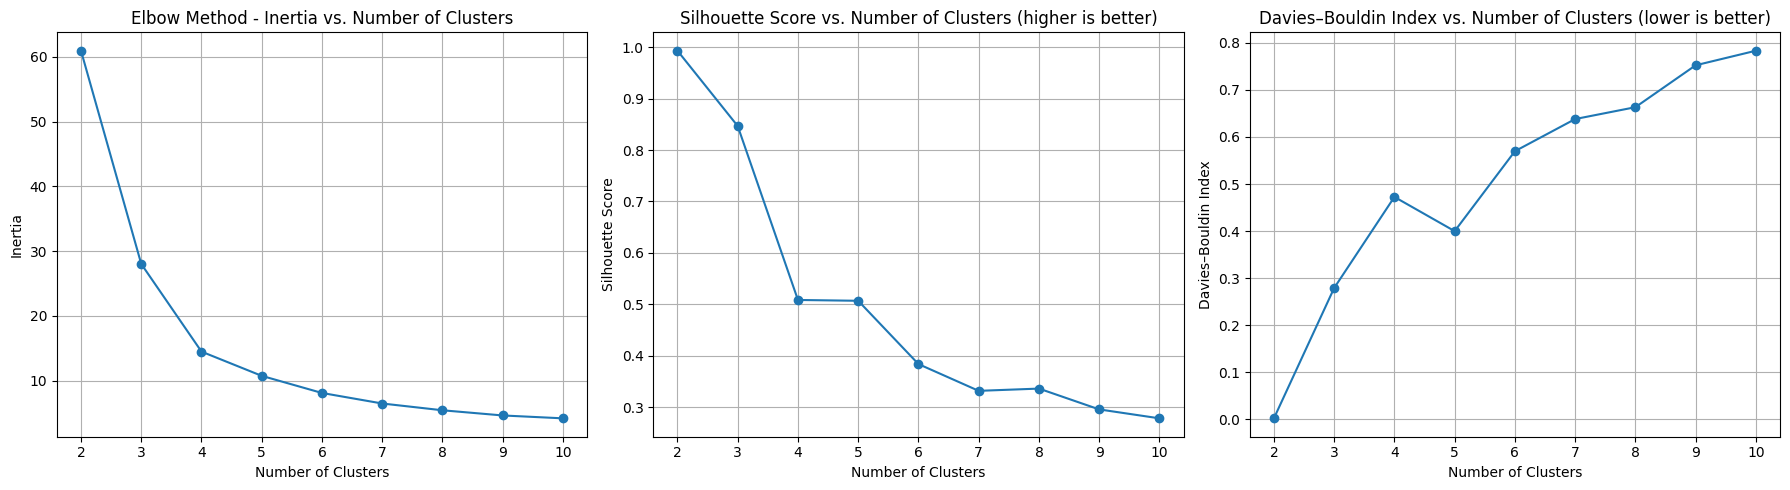

In [280]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
#import numpy as np

# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
11000011        0
11000016        0
13000011        0
13000019        0

            10000009  11000011  11000016  13000011  13000019  13000065  \
2009-03-01  0.896438  1.478244  1.146456  0.623494  0.936948  1.381023   
2009-03-02  0.952758  1.466891  1.319982  0.764282  1.035052  1.529592   
2009-03-03  1.112746  1.447361  1.381373  0.769005  1.075335  1.590633   
2009-03-04  1.003412  1.442402  1.317346  0.726816  0.999024  1.475313   
2009-03-05  0.926896  1.436884  1.211486  0.646153  0.943940  1.392234   
...              ...       ...       ...       ...       ...       ...   
2009-05-27  0.612017  0.466732  0.542197  0.431598  0.584412  0.863360   
2009-05-28  0.616946  0.479804  0.550635  0.436693  0.600337  0.888280   
2009-05-29  0.591569  0.481301  0.520247  0.399109  0.560755  0.826878   
2009-05-30  0.567286  0.468755  0.507731  0.378796  0.539516  0.793979   
2009-05-31  0.558966  0.456089  0.488505  0.362970  0.532231  0.782736   

            14000016  14000020  14000022  15000002  ...  66000014  67000017  \
2009-03-01  0.929403  0.616124  

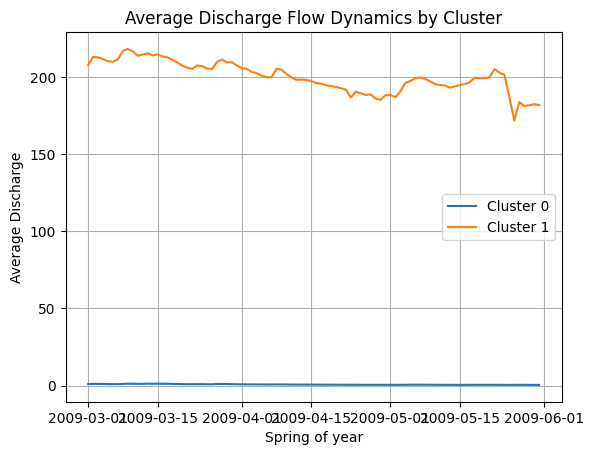

In [281]:
kmeans_final = KMeans(n_clusters=2, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure()
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Spring of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [282]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering\Scores')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)
print(out_path)

C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering\Scores


In [283]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  11000011  11000016  13000011  13000019  13000065  \
2009-03-01  0.896438  1.478244  1.146456  0.623494  0.936948  1.381023   
2009-03-02  0.952758  1.466891  1.319982  0.764282  1.035052  1.529592   
2009-03-03  1.112746  1.447361  1.381373  0.769005  1.075335  1.590633   
2009-03-04  1.003412  1.442402  1.317346  0.726816  0.999024  1.475313   
2009-03-05  0.926896  1.436884  1.211486  0.646153  0.943940  1.392234   
...              ...       ...       ...       ...       ...       ...   
2009-05-27  0.612017  0.466732  0.542197  0.431598  0.584412  0.863360   
2009-05-28  0.616946  0.479804  0.550635  0.436693  0.600337  0.888280   
2009-05-29  0.591569  0.481301  0.520247  0.399109  0.560755  0.826878   
2009-05-30  0.567286  0.468755  0.507731  0.378796  0.539516  0.793979   
2009-05-31  0.558966  0.456089  0.488505  0.362970  0.532231  0.782736   

            14000016  14000020  14000022  15000002  ...  66000014  67000017  \
2009-03-01  0.929403  0.616124  0.934719  0.700538  ...  1.736479  2.015832   
2009-03-02  1.005822  0.801235  1.020151  0.872619  ...  1.503599  1.776563   
2009-03-03  1.101087  0.720800  1.091381  0.925435  ...  1.389255  1.668079   
2009-03-04  1.017155  0.660888  0.999813  0.848748  ...  1.253336  1.510180   
2009-03-05  0.971481  0.643541  0.964254  0.772871  ...  1.145819  1.384622   
...              ...       ...       ...       ...  ...       ...       ...   
2009-05-27  0.725722  0.408047  0.793539  0.530222  ...  0.264935  0.134976   
2009-05-28  0.720045  0.425281  0.785304  0.520280  ...  0.324586  0.227638   
2009-05-29  0.691538  0.388997  0.772611  0.511921  ...  0.199670  0.202706   
2009-05-30  0.686353  0.381796  0.768738  0.549709  ...  0.157012  0.156658   
2009-05-31  0.685072  0.373688  0.768771  0.519109  ...  0.140814  0.129571   

            67000018  67000019   7000003   8000001   9000001   9000015  \
2009-03-01  2.194415  2.653044  1.050327  1.060041  1.577563  1.525048   
2009-03-02  1.798628  2.019497  1.207692  1.199500  1.687552  1.625606   
2009-03-03  1.582409  2.234558  1.479886  1.439296  1.740202  1.673741   
2009-03-04  1.395814  2.084261  1.289046  1.276347  1.714415  1.650165   
2009-03-05  1.249802  2.314989  1.083448  1.097997  1.616113  1.560293   
...              ...       ...       ...       ...       ...       ...   
2009-05-27  0.196159  0.357844  0.225083  0.358749  0.902538  0.907904   
2009-05-28  0.285425  0.459366  0.226068  0.350220  0.919780  0.923667   
2009-05-29  0.264646  0.413316  0.209741  0.335685  0.904389  0.909597   
2009-05-30  0.193440  0.328263  0.200843  0.323886  0.854596  0.864073   
2009-05-31  0.164054  0.278234  0.195663  0.315571  0.826828  0.838685   

            22000047  25000592  
2009-03-01  0.590254  1.256053  
2009-03-02  0.584218  1.397585  
2009-03-03  0.571177  1.346498  
2009-03-04  0.574294  1.289749  
2009-03-05  0.575066  1.252809  
...              ...       ...  
2009-05-27  0.529564  1.184285  
2009-05-28  0.512518  1.172875  
2009-05-29  0.491948  1.131184  
2009-05-30  0.489025  1.120591  
2009-05-31  0.489159  1.112197  

[92 rows x 264 columns]

<Axes: >

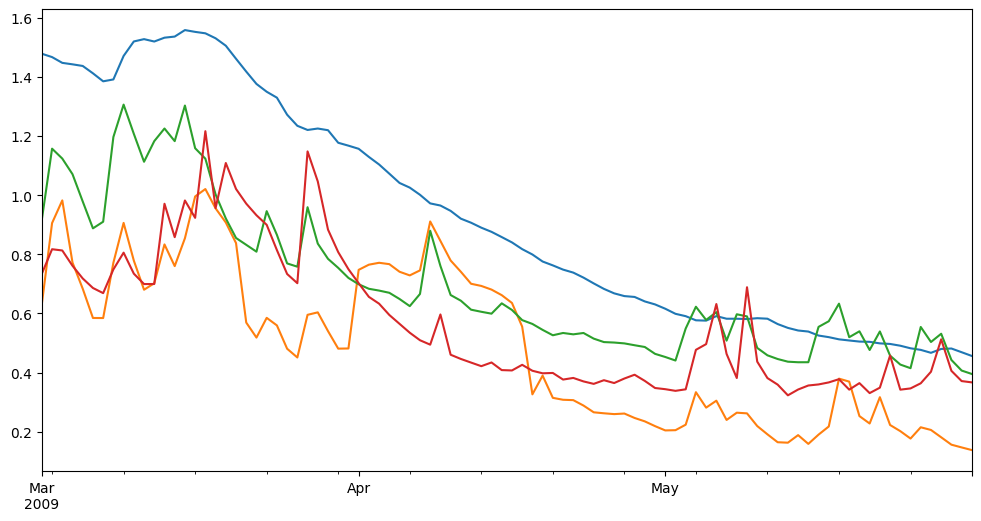

In [284]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

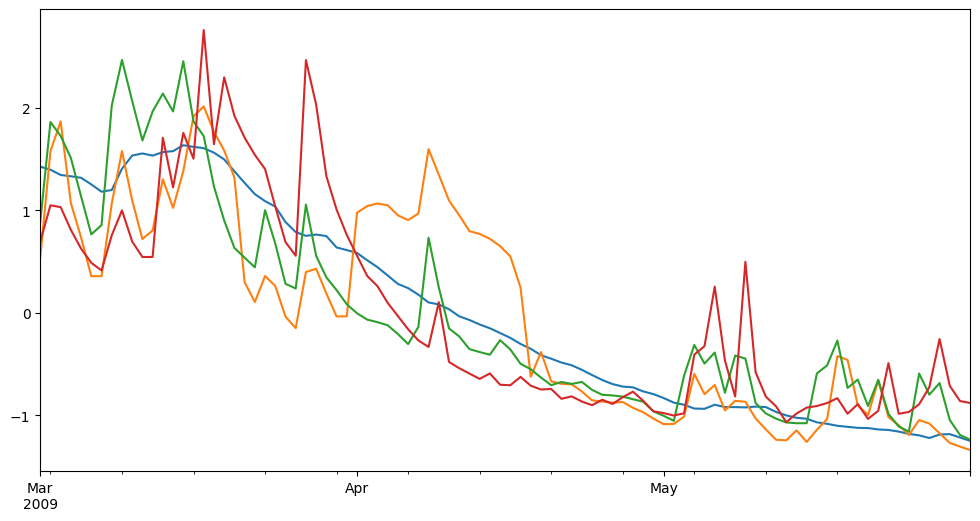

In [285]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

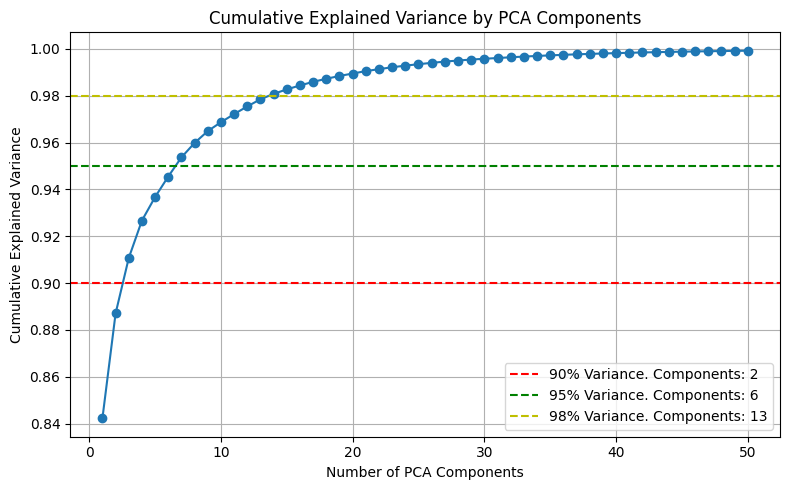

In [286]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [287]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 1.63469111e+01, -1.04743877e+00, -5.20816842e+00, ...,
        -8.38494959e-02,  5.61640192e-01, -9.41165808e-02],
       [ 2.19691687e+01,  2.75575737e+00, -1.03238508e+00, ...,
        -2.40892950e-01,  9.50490844e-01,  2.80716084e-01],
       [ 2.27882122e+01,  2.19363052e+00,  7.04679536e-01, ...,
         5.88024839e-01, -4.09985643e-01,  9.35700349e-02],
       ...,
       [-1.66958266e+01,  3.94790450e+00, -2.19242574e+00, ...,
         7.22687523e-01,  6.37565310e-02,  5.77149914e-02],
       [-1.80194368e+01,  3.62907844e+00, -2.50521684e+00, ...,
         8.62735530e-01, -1.34755056e-02,  6.68381679e-02],
       [-1.88476812e+01,  3.59527892e+00, -2.66291231e+00, ...,
         3.27135490e-01, -3.23903928e-01,  3.45326046e-01]],
      shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_26696\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


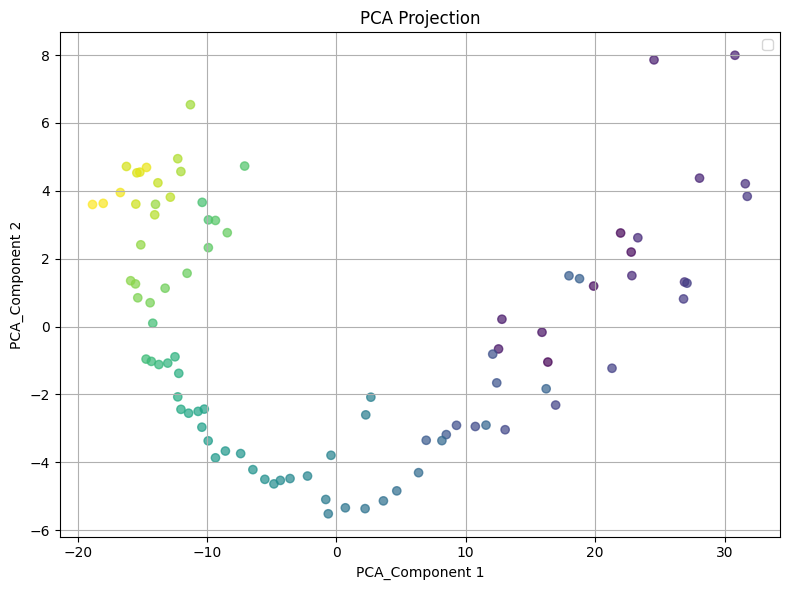

In [288]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_26696\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


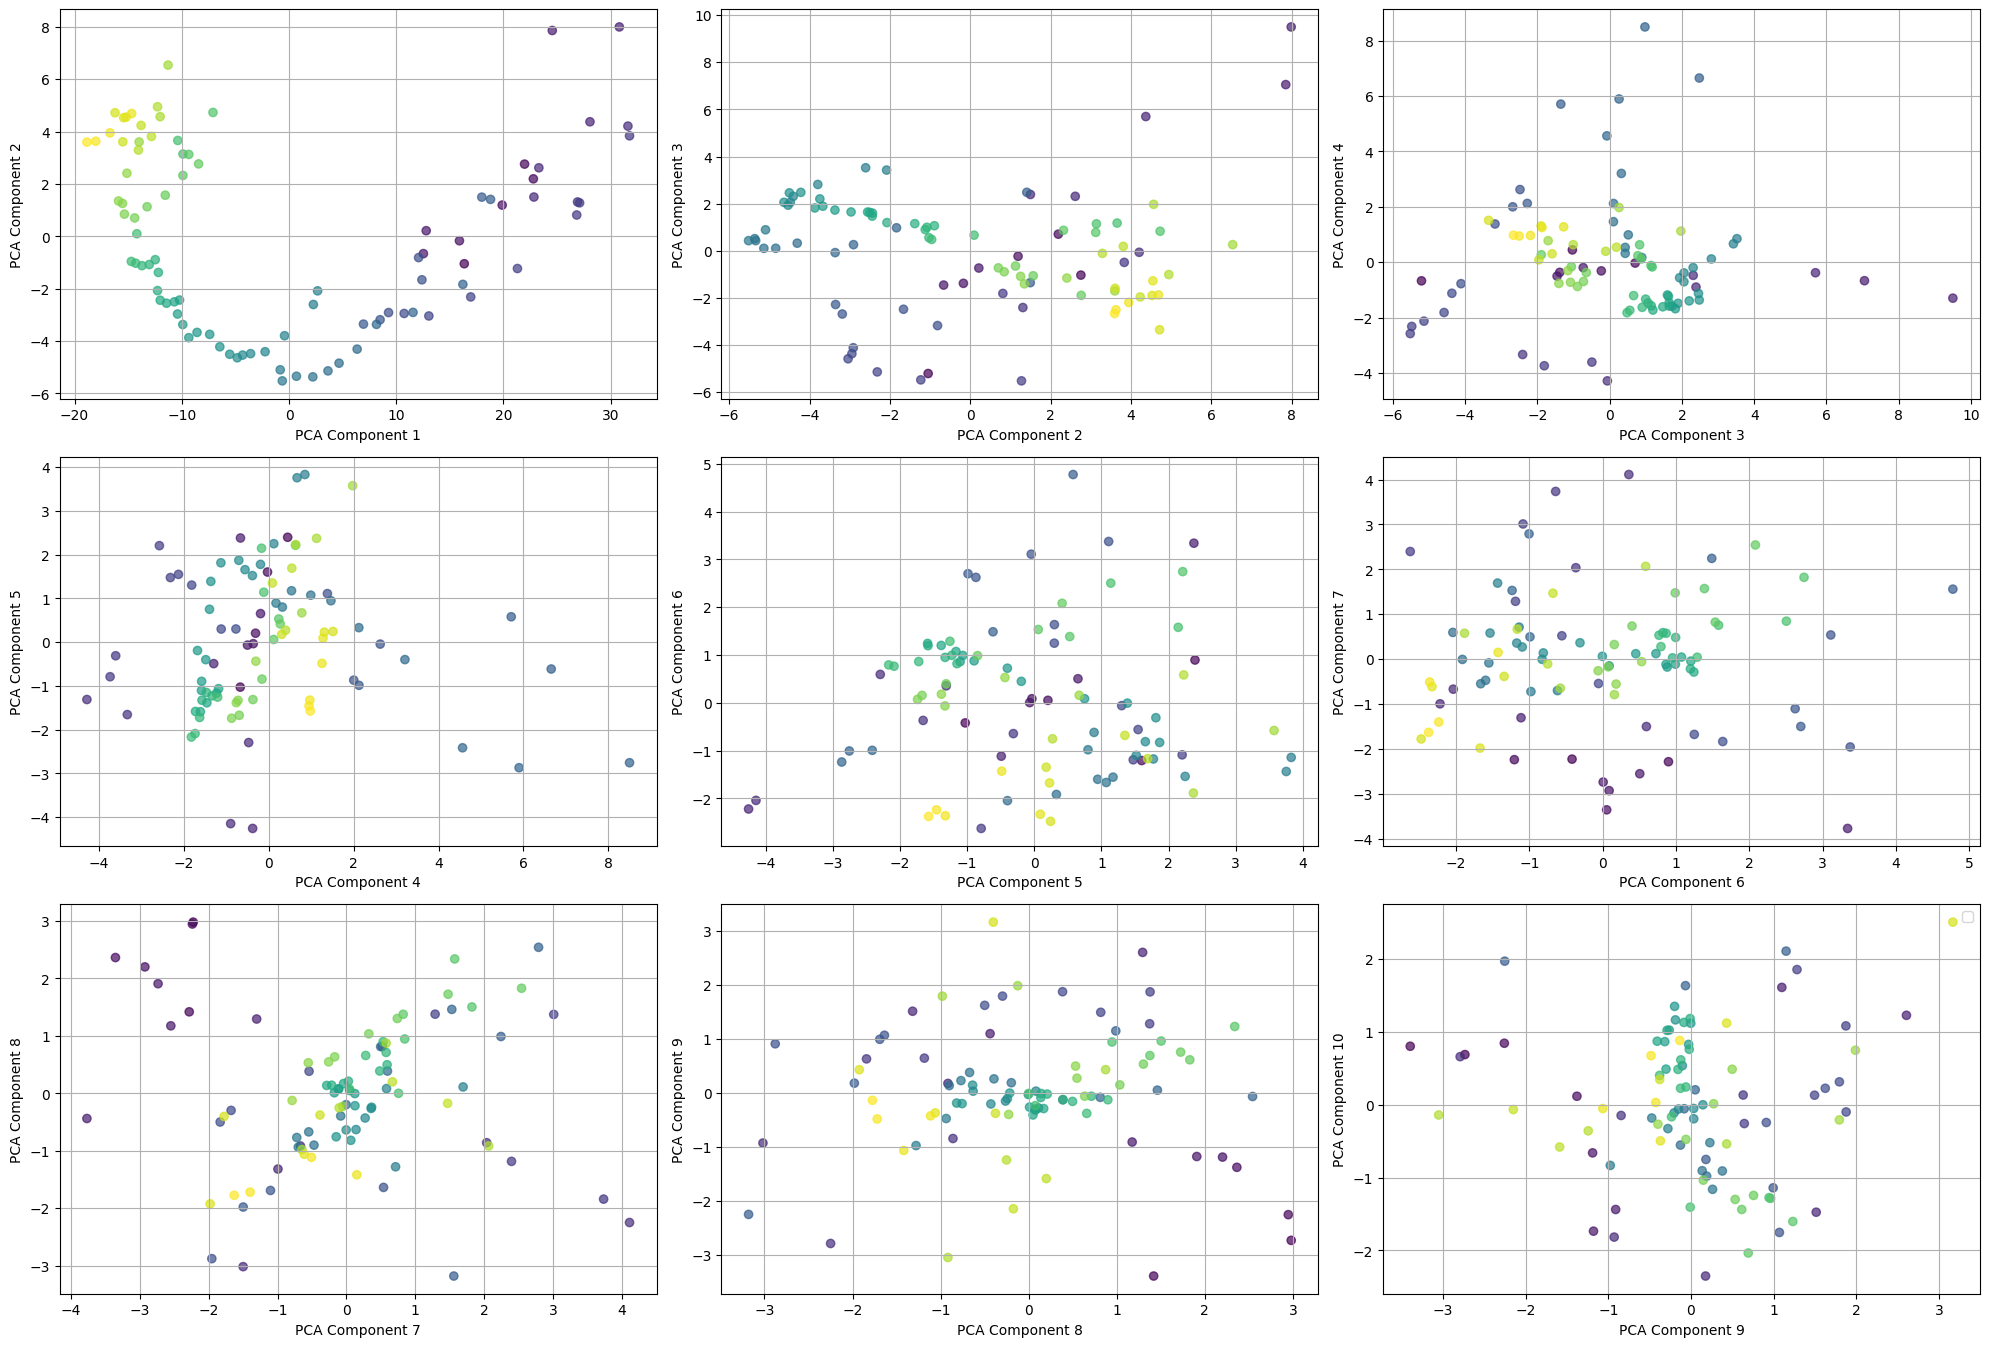

In [289]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [290]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.321
KMeans Davies-Bouldin Index is 0.980


<Axes: xlabel='k'>

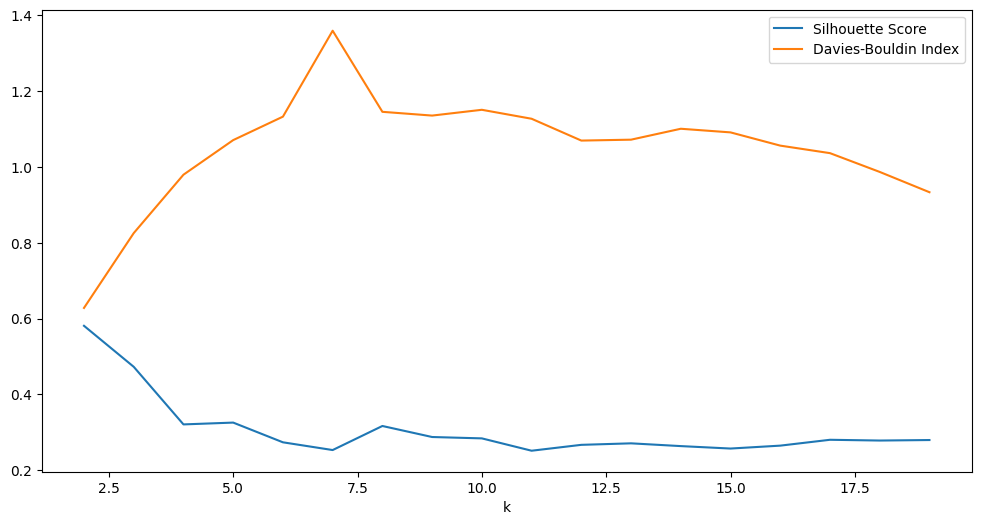

In [291]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         4     79         -0.154567   
4    1.52            3         4     73         -0.171608   
5    1.78            3         5     68         -0.125408   
6    2.03            3         4     65         -0.103793   
7    2.29            3         4     60         -0.113478   
8    2.54            3         4     53         -0.071923   
9    2.80            3         4     53         -0.071923   
10   3.05            3         4     52         -0.060414   
11   3.31            3         5     42          0.054954   
12   3.56            3         2     42          0.050506   
13   3.82            3         1     41               NaN   
14   4.07            3         2     34          0.228915   
15   4.33            3         3     27          0.208593   
16   4.58            3         4     21          0.261435   
17   4.84            3         4     21          0.261435   
18   5.09            3         3     21          0.269857   
19   5.35            3         3     20          0.297769   
20   5.60            3         4     16          0.267734   
21   5.86            3         3     14          0.353093   
22   6.11            3         3     13          0.364770   
23   6.37            3         3     13          0.364770   
24   6.62            3         3     12          0.357202   
25   6.88            3         3     12          0.357202   
26   7.13            3         1     10               NaN   
27   7.39            3         1      8               NaN   
28   7.64            3         1      7               NaN   
29   7.90            3         2      3          0.281973   
30   8.15            3         2      3          0.281973   
31   8.41            3         2      3          0.281973   
32   8.66            3         1      3               NaN   
33   8.92            3         1      3               NaN   
34   9.17            3         1      1               NaN   
35   9.43            3         1      1               NaN   
36   9.68            3         1      1               NaN   
37   9.94            3         1      1               NaN   
38  10.19            3         1      1               NaN   
39  10.45            3         1      1               NaN   
40  10.70            3         1      0               NaN   
41  10.96            3         1      0               NaN   
42  11.21            3         1      0               NaN   
43  11.47            3         1      0               NaN   
44  11.72            3         1      0               NaN   
45  11.98            3         1      0               NaN   
46  12.23            3         1      0               NaN   
47  12.49            3         1      0               NaN   
48  12.74            3         1      0               NaN   
49  13.00            3         1      0               NaN   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3               1.076582  
4               1.298779  
5               1.307613  
6               1.325833  
7               1.724491  
8               1.383631  
9               1.383631  
10              1.366902  
11              1.193878  
12              1.422517  
13                   NaN  
14              1.578372  
15              2.082494  
16              1.940021  
17              1.940021  
18              2.505565  
19              2.598366  
20              1.650335  
21              1.305334  
22              1.209768  
23              1.209768  
24              1.147482  
25              1.147482  
26                   NaN  
27                   NaN  
28                   NaN  
29              1.343723  
30              1.343723  
31              1.343723  
32 

<Axes: xlabel='eps'>

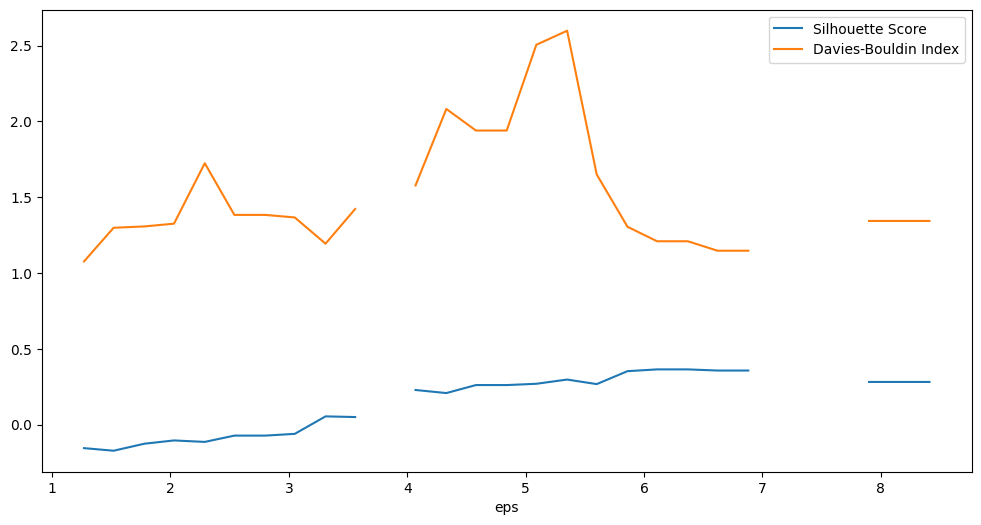

In [292]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

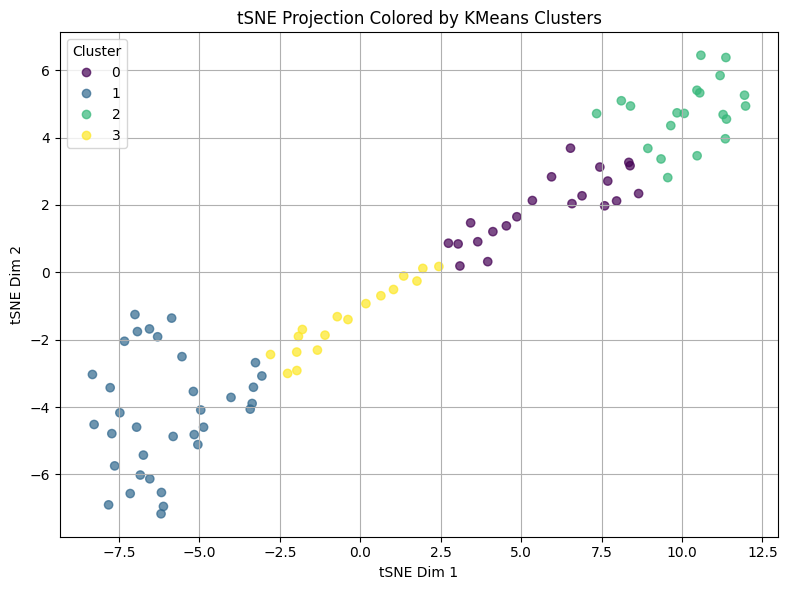

In [293]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        23     72          0.077117   
1    0.05            2        20     61          0.061984   
2    0.06            2        16     47          0.059481   
3    0.06            2         9     43         -0.089460   
4    0.07            2         9     31         -0.106101   
..    ...          ...       ...    ...               ...   
195  0.98            2         1      2               NaN   
196  0.99            2         1      2               NaN   
197  0.99            2         1      2               NaN   
198  1.00            2         1      2               NaN   
199  1.00            2         1      2               NaN   

     Davies-Bouldin Index  
0                0.683979  
1                0.742380  
2                0.801719  
3                0.681307  
4                0.828946  
..                    ...  
195                   NaN  
196                   NaN  
197                   NaN  
198                   NaN  
199                   NaN  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

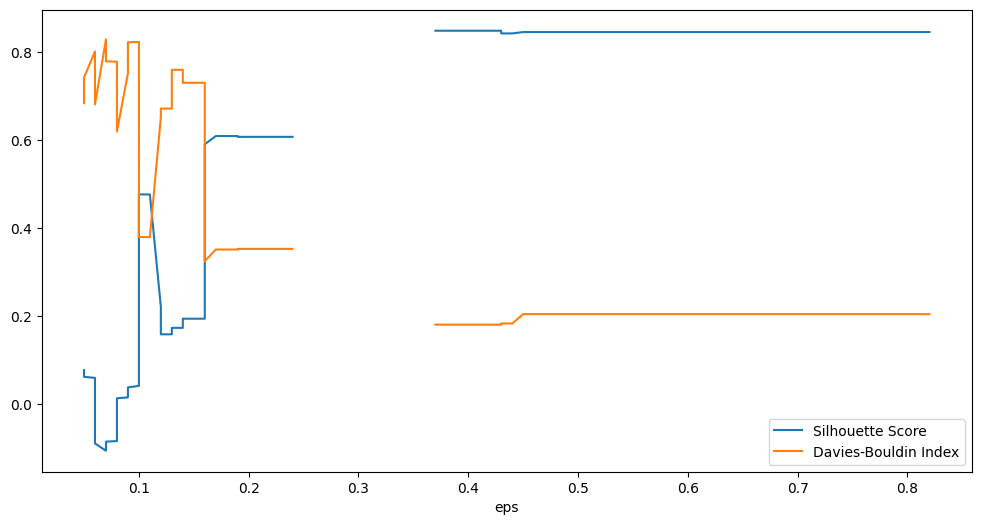

In [294]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Summer (2)

In [295]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [296]:
#Start with spring and work our way down to winter
season = 2
season_year = 2009
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 92 entries, 2009-06-01 to 2009-08-31
Columns: 257 entries, 10000009 to 25000592
dtypes: float64(257)
memory usage: 185.4 KB


None

            10000009  11000011  11000016  13000011  13000019  13000065  \
2009-06-01  0.551139  0.445549  0.480035  0.347674  0.524915  0.771415   
2009-06-02  0.551569  0.436367  0.476476  0.341721  0.514625  0.755470   
2009-06-03  0.570853  0.431693  0.471386  0.340680  0.515677  0.757114   
2009-06-04  0.579729  0.418243  0.521903  0.340439  0.511858  0.751185   
2009-06-05  0.566503  0.413724  0.550773  0.341614  0.504443  0.739634   
...              ...       ...       ...       ...       ...       ...   
2009-08-27  0.694181  0.338160  0.399735  0.381936  0.585444  0.726999   
2009-08-28  0.668588  0.338592  0.401743  0.357856  0.582252  0.704497   
2009-08-29  0.702216  0.348314  0.427893  0.422858  0.622367  0.825386   
2009-08-30  0.857465  0.363360  0.463813  0.634279  0.733202  0.954640   
2009-08-31  0.937571  0.369028  0.464472  0.593170  0.755661  0.849661   

            14000016  14000020  14000022  15000002  ...  66000014  67000017  \
2009-06-01  0.685588  0.366404  

          2009-06-01  2009-06-02  2009-06-03  2009-06-04  2009-06-05  \
10000009   -0.052680   -0.052296   -0.050800   -0.050457   -0.054972   
11000011   -0.062062   -0.062605   -0.063167   -0.064678   -0.068302   
11000016   -0.058998   -0.059016   -0.059639   -0.055549   -0.056344   
13000011   -0.070759   -0.071074   -0.071255   -0.071530   -0.074593   
13000019   -0.055010   -0.055602   -0.055703   -0.056434   -0.060386   
...              ...         ...         ...         ...         ...   
8000001    -0.074260   -0.074579   -0.073407   -0.074364   -0.078158   
9000001    -0.029530   -0.029808   -0.031983   -0.031165   -0.035559   
9000015    -0.028361   -0.028563   -0.030592   -0.029909   -0.034241   
22000047   -0.057401   -0.056202   -0.056828   -0.058843   -0.063307   
25000592   -0.003333   -0.001976   -0.002676   -0.000917   -0.005023   

          2009-06-06  2009-06-07  2009-06-08  2009-06-09  2009-06-10  ...  \
10000009   -0.052186   -0.051432   -0.052121   -0.051815  

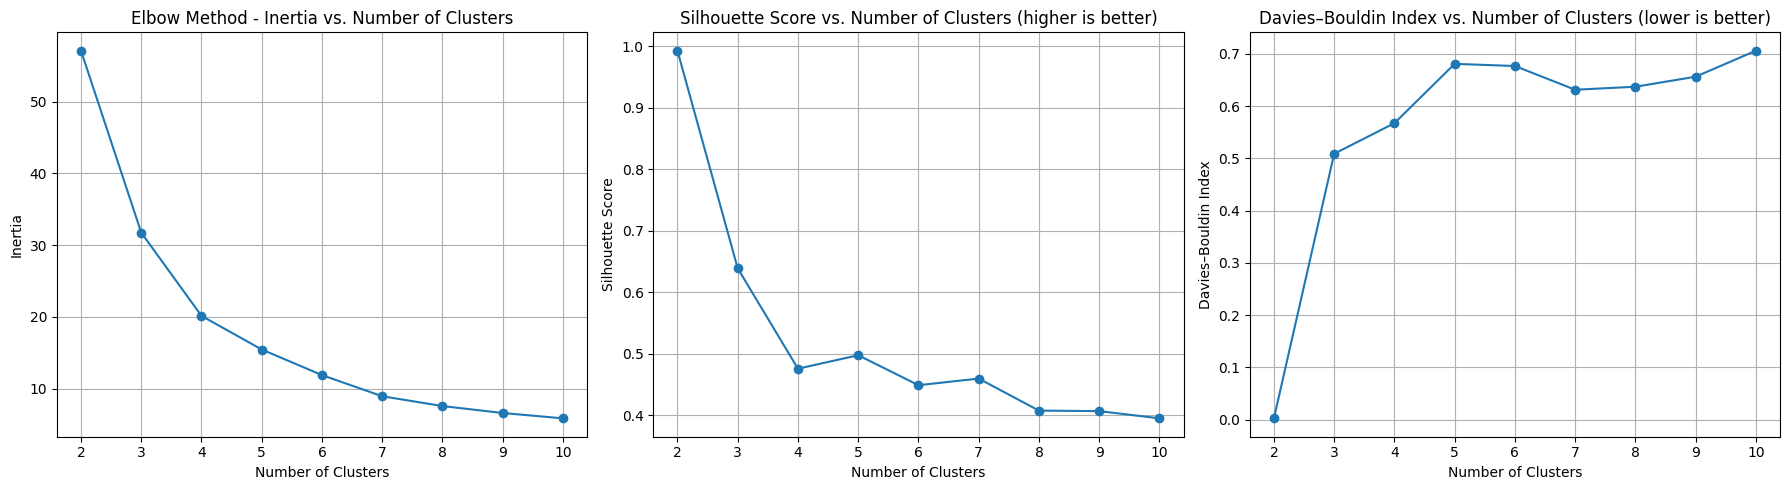

In [297]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
11000011        0
11000016        0
13000011        0
13000019        0

            10000009  11000011  11000016  13000011  13000019  13000065  \
2009-06-01  0.551139  0.445549  0.480035  0.347674  0.524915  0.771415   
2009-06-02  0.551569  0.436367  0.476476  0.341721  0.514625  0.755470   
2009-06-03  0.570853  0.431693  0.471386  0.340680  0.515677  0.757114   
2009-06-04  0.579729  0.418243  0.521903  0.340439  0.511858  0.751185   
2009-06-05  0.566503  0.413724  0.550773  0.341614  0.504443  0.739634   
...              ...       ...       ...       ...       ...       ...   
2009-08-27  0.694181  0.338160  0.399735  0.381936  0.585444  0.726999   
2009-08-28  0.668588  0.338592  0.401743  0.357856  0.582252  0.704497   
2009-08-29  0.702216  0.348314  0.427893  0.422858  0.622367  0.825386   
2009-08-30  0.857465  0.363360  0.463813  0.634279  0.733202  0.954640   
2009-08-31  0.937571  0.369028  0.464472  0.593170  0.755661  0.849661   

            14000016  14000020  14000022  15000002  ...  66000014  67000017  \
2009-06-01  0.685588  0.366404  

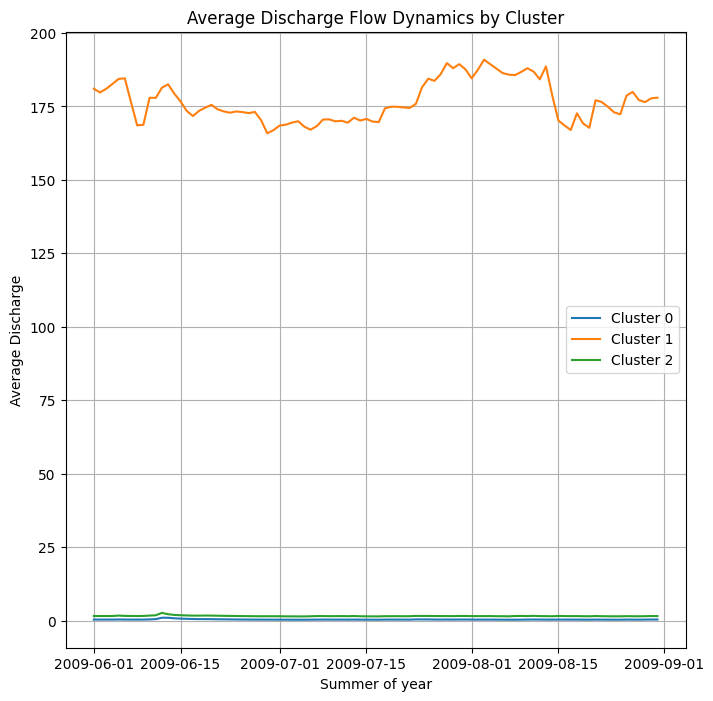

In [298]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Summer of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [299]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [300]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  11000011  11000016  13000011  13000019  13000065  \
2009-06-01  0.551139  0.445549  0.480035  0.347674  0.524915  0.771415   
2009-06-02  0.551569  0.436367  0.476476  0.341721  0.514625  0.755470   
2009-06-03  0.570853  0.431693  0.471386  0.340680  0.515677  0.757114   
2009-06-04  0.579729  0.418243  0.521903  0.340439  0.511858  0.751185   
2009-06-05  0.566503  0.413724  0.550773  0.341614  0.504443  0.739634   
...              ...       ...       ...       ...       ...       ...   
2009-08-27  0.694181  0.338160  0.399735  0.381936  0.585444  0.726999   
2009-08-28  0.668588  0.338592  0.401743  0.357856  0.582252  0.704497   
2009-08-29  0.702216  0.348314  0.427893  0.422858  0.622367  0.825386   
2009-08-30  0.857465  0.363360  0.463813  0.634279  0.733202  0.954640   
2009-08-31  0.937571  0.369028  0.464472  0.593170  0.755661  0.849661   

            14000016  14000020  14000022  15000002  ...  66000014  67000017  \
2009-06-01  0.685588  0.366404  0.770575  0.517294  ...  0.133109  0.110019   
2009-06-02  0.687232  0.369541  0.768772  0.511085  ...  0.134205  0.095873   
2009-06-03  0.696396  0.371725  0.776835  0.488358  ...  0.139934  0.121541   
2009-06-04  0.692111  0.372268  0.779253  0.480806  ...  0.133004  0.113504   
2009-06-05  0.694904  0.381310  0.784570  0.481999  ...  0.122249  0.093503   
...              ...       ...       ...       ...  ...       ...       ...   
2009-08-27  0.749663  0.386266  0.941601  0.603309  ...  0.026343  0.010522   
2009-08-28  0.720808  0.379938  0.867507  0.575868  ...  0.026276  0.010179   
2009-08-29  0.693849  0.399591  0.833930  0.574062  ...  0.029589  0.009011   
2009-08-30  0.691417  0.429968  0.847947  0.588733  ...  0.029905  0.008671   
2009-08-31  0.693699  0.399866  0.839515  0.577750  ...  0.028966  0.008664   

            67000018  67000019   7000003   8000001   9000001   9000015  \
2009-06-01  0.146976  0.242121  0.192616  0.308272  0.811674  0.824831   
2009-06-02  0.135624  0.215993  0.190883  0.302552  0.802884  0.816795   
2009-06-03  0.158781  0.263402  0.189482  0.316455  0.782604  0.798254   
2009-06-04  0.148346  0.248557  0.186918  0.308249  0.798801  0.813062   
2009-06-05  0.123735  0.211615  0.187370  0.300754  0.788999  0.804100   
...              ...       ...       ...       ...       ...       ...   
2009-08-27  0.012940  0.011484  0.415898  0.545091  0.641464  0.669216   
2009-08-28  0.011177  0.011532  0.378630  0.539154  0.641191  0.668966   
2009-08-29  0.013743  0.013736  0.377287  0.544332  0.694922  0.718090   
2009-08-30  0.042619  0.019686  0.380986  0.554539  0.664758  0.690513   
2009-08-31  0.024744  0.018303  0.378440  0.557243  0.761731  0.779171   

            22000047  25000592  
2009-06-01  0.498002  1.106489  
2009-06-02  0.507917  1.113906  
2009-06-03  0.503026  1.112390  
2009-06-04  0.484505  1.142285  
2009-06-05  0.470975  1.138976  
...              ...       ...  
2009-08-27  0.392278  0.919861  
2009-08-28  0.408506  0.937918  
2009-08-29  0.428389  0.972749  
2009-08-30  0.422297  1.061634  
2009-08-31  0.399014  0.984102  

[92 rows x 257 columns]

<Axes: >

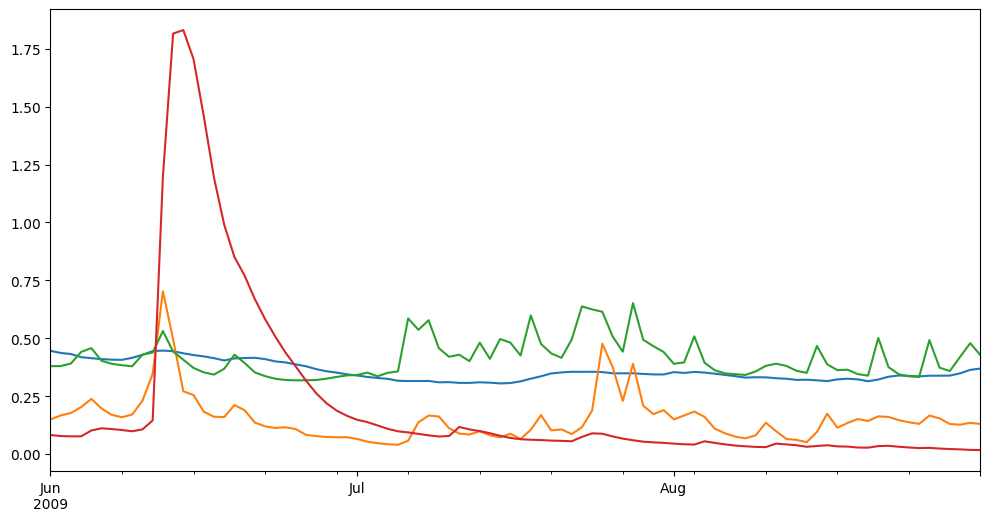

In [301]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

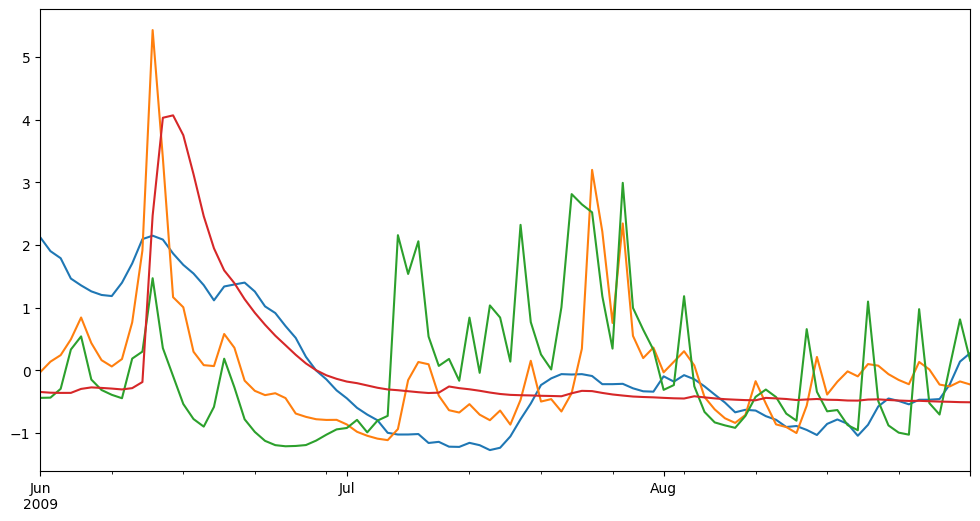

In [302]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

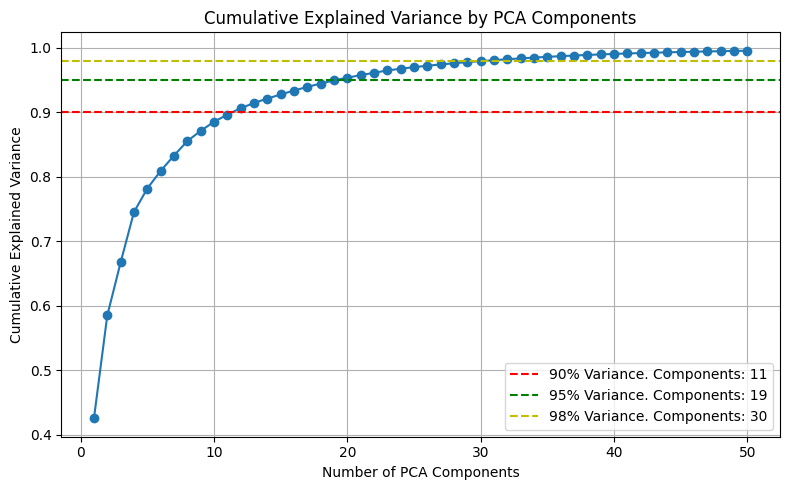

In [303]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [304]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 1.63075696,  1.33795178,  8.70842616, ..., -0.02152456,
        -0.34623798,  0.74592597],
       [ 1.14140732,  1.1358538 ,  8.31123337, ..., -0.2318785 ,
        -0.73479641,  0.67241209],
       [ 1.26484872,  1.08036866,  7.66994697, ..., -0.22277234,
        -0.72282295,  0.38492418],
       ...,
       [-2.58324067,  9.41796809,  3.24090969, ..., -0.92762151,
        -0.81254449,  1.96880607],
       [ 1.66370388, 14.72583514,  3.8480252 , ...,  0.75247123,
         0.30477569,  1.20467909],
       [ 1.96930895, 15.64627277,  4.32999658, ...,  2.80293133,
         0.32892452,  0.61950868]], shape=(92, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_26696\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


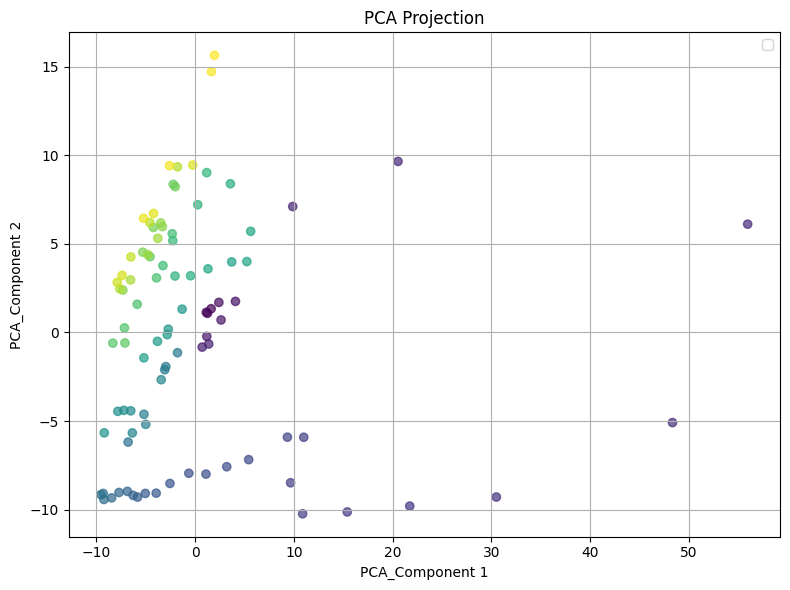

In [305]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_26696\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


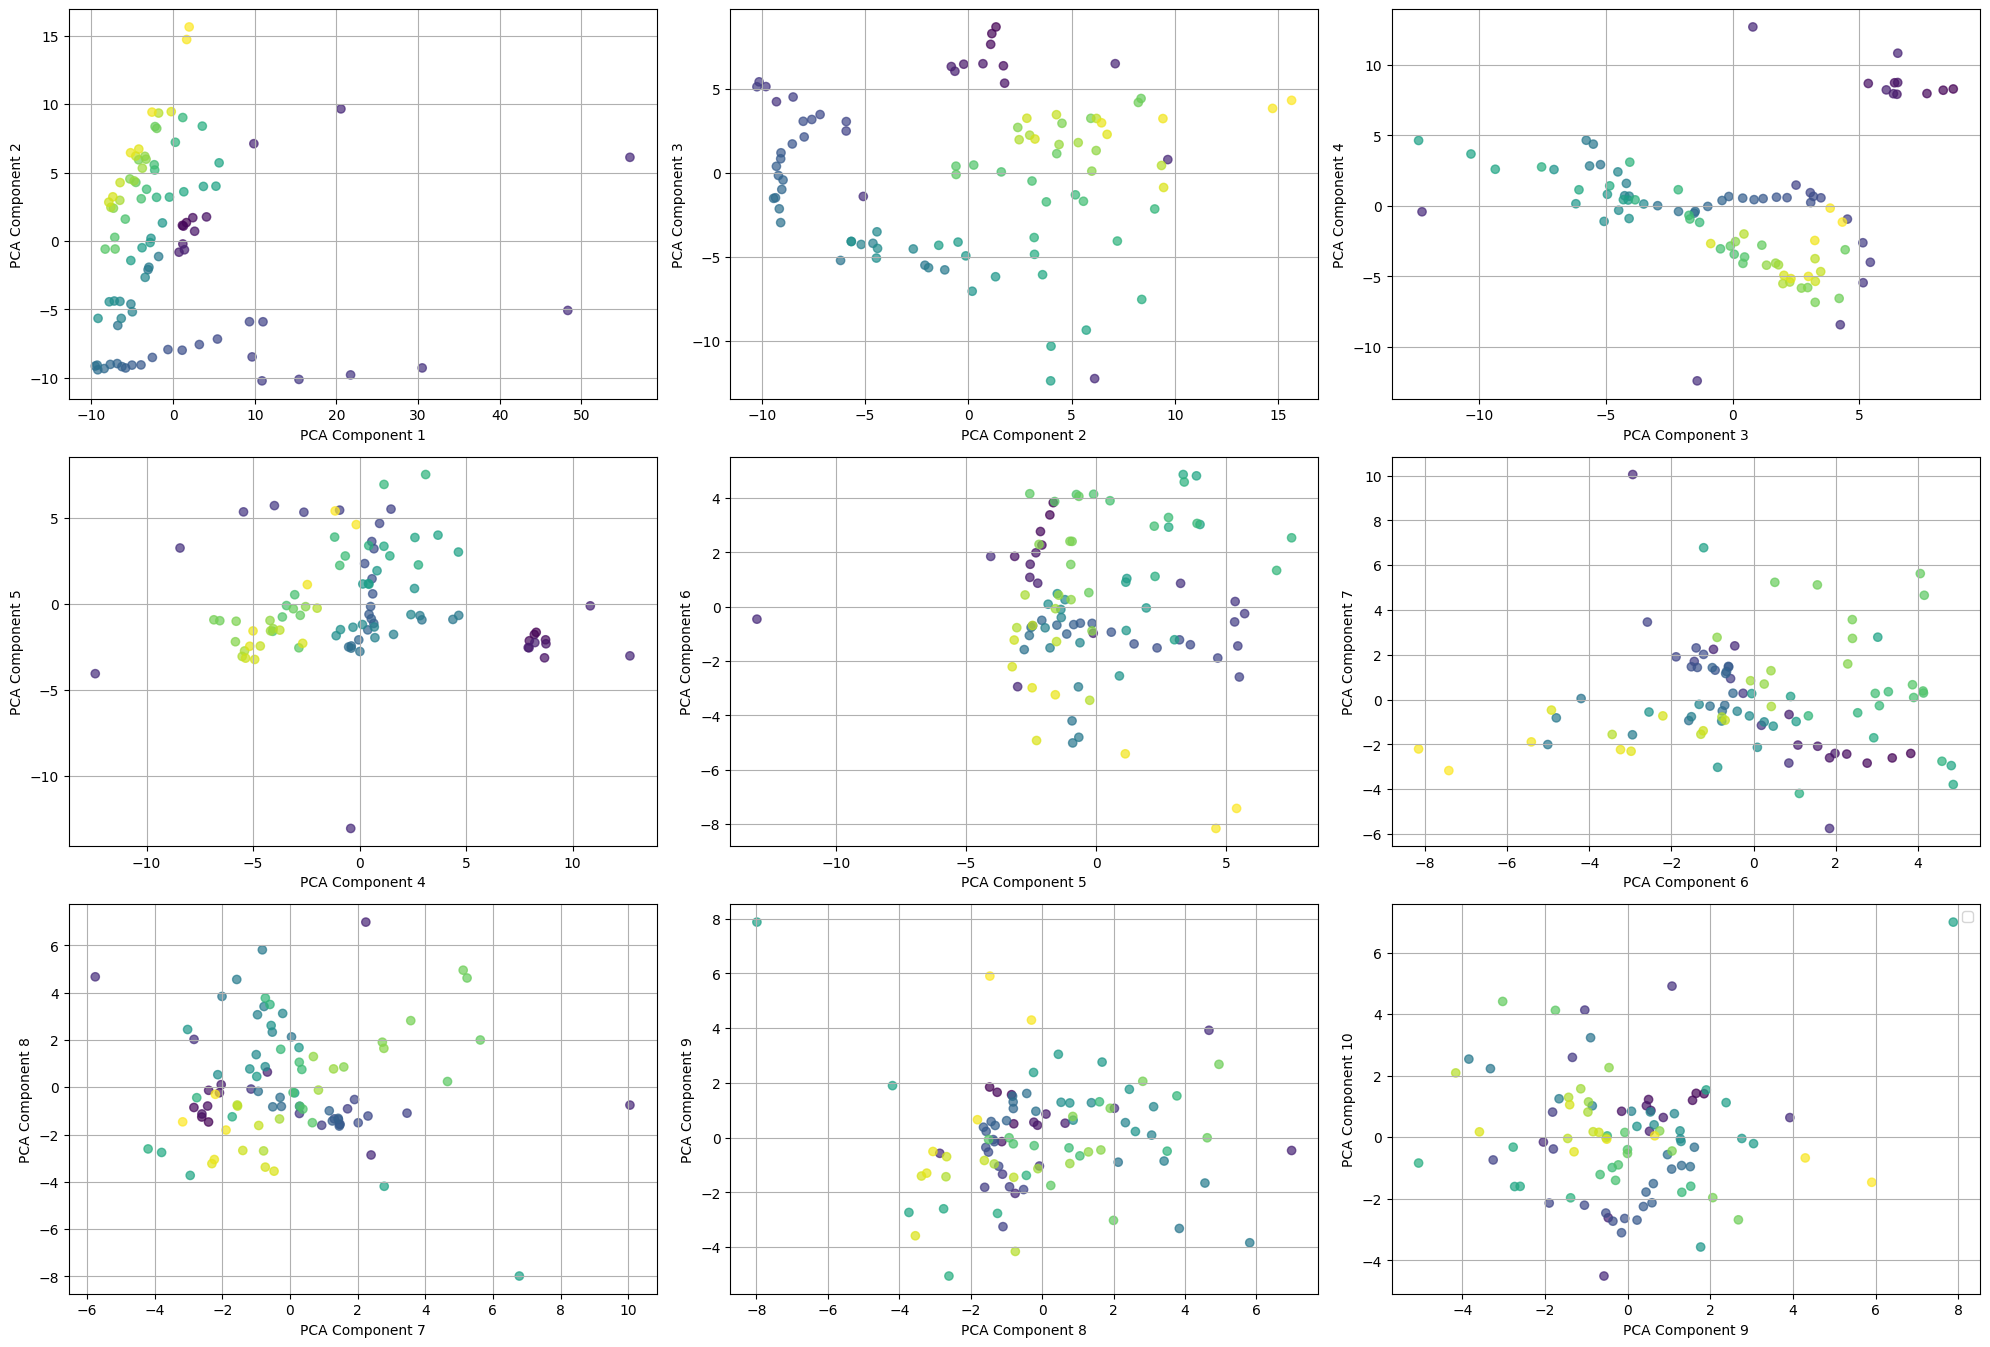

In [306]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [307]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.254
KMeans Davies-Bouldin Index is 1.282


<Axes: xlabel='k'>

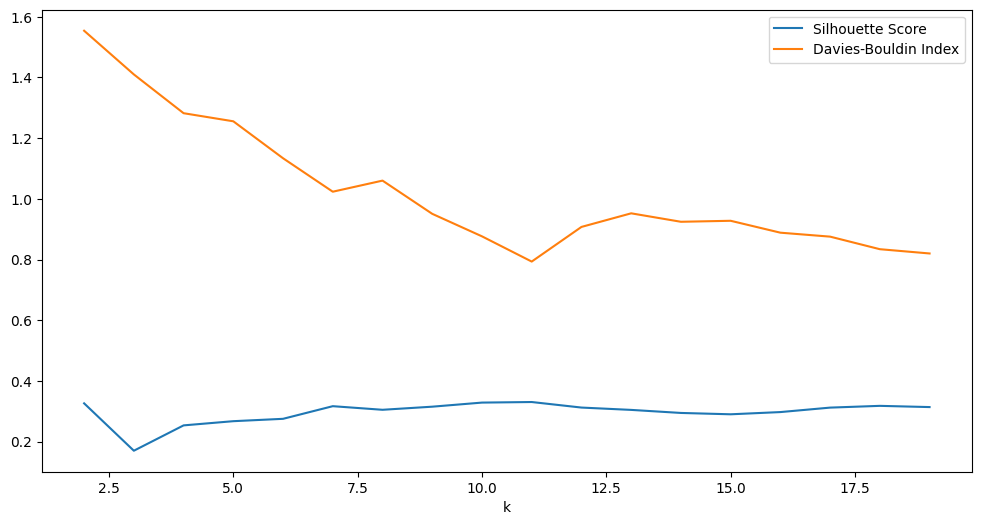

In [308]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     92               NaN   
1    0.76            3         0     92               NaN   
2    1.01            3         0     92               NaN   
3    1.27            3         1     89               NaN   
4    1.52            3         3     81         -0.095065   
5    1.78            3         3     80         -0.084077   
6    2.03            3         3     79         -0.077472   
7    2.29            3         4     71         -0.059703   
8    2.54            3         5     66         -0.105642   
9    2.80            3         5     63         -0.098770   
10   3.05            3         5     60         -0.063661   
11   3.31            3         4     58         -0.017450   
12   3.56            3         5     54         -0.006285   
13   3.82            3         6     49          0.031604   
14   4.07            3         7     45          0.044346   
15   4.33            3         9     39          0.089339   
16   4.58            3         9     38          0.098729   
17   4.84            3         9     36          0.080808   
18   5.09            3         7     35          0.082095   
19   5.35            3         8     30          0.098255   
20   5.60            3         7     28          0.104558   
21   5.86            3         6     28          0.105321   
22   6.11            3         6     26          0.116210   
23   6.37            3         5     25          0.145478   
24   6.62            3         4     24          0.124712   
25   6.88            3         3     23          0.196572   
26   7.13            3         3     22          0.196539   
27   7.39            3         3     19          0.192634   
28   7.64            3         3     18          0.193129   
29   7.90            3         3     16          0.204334   
30   8.15            3         3     16          0.204334   
31   8.41            3         3     16          0.204334   
32   8.66            3         3     12          0.225885   
33   8.92            3         2     10          0.166401   
34   9.17            3         2     10          0.166401   
35   9.43            3         2     10          0.166401   
36   9.68            3         2     10          0.166401   
37   9.94            3         2     10          0.166401   
38  10.19            3         2      9          0.166171   
39  10.45            3         2      7          0.163356   
40  10.70            3         2      7          0.163356   
41  10.96            3         2      5          0.149823   
42  11.21            3         2      5          0.149823   
43  11.47            3         2      5          0.149823   
44  11.72            3         2      5          0.149823   
45  11.98            3         2      5          0.149823   
46  12.23            3         2      5          0.149823   
47  12.49            3         2      5          0.149823   
48  12.74            3         2      5          0.149823   
49  13.00            3         2      5          0.149823   

    Davies-Bouldin Index  
0                    NaN  
1                    NaN  
2                    NaN  
3                    NaN  
4               1.124233  
5               1.139693  
6               1.167331  
7               1.276687  
8               1.340483  
9               1.384356  
10              1.381530  
11              1.510317  
12              1.576884  
13              1.509508  
14              1.616147  
15              1.542441  
16              1.541126  
17              1.600709  
18              1.628552  
19              1.553337  
20              1.620700  
21              1.665938  
22              1.718330  
23              1.743492  
24              1.795738  
25              1.821097  
26              1.848290  
27              1.931255  
28              1.905399  
29              1.826968  
30              1.826968  
31              1.826968  
32 

<Axes: xlabel='eps'>

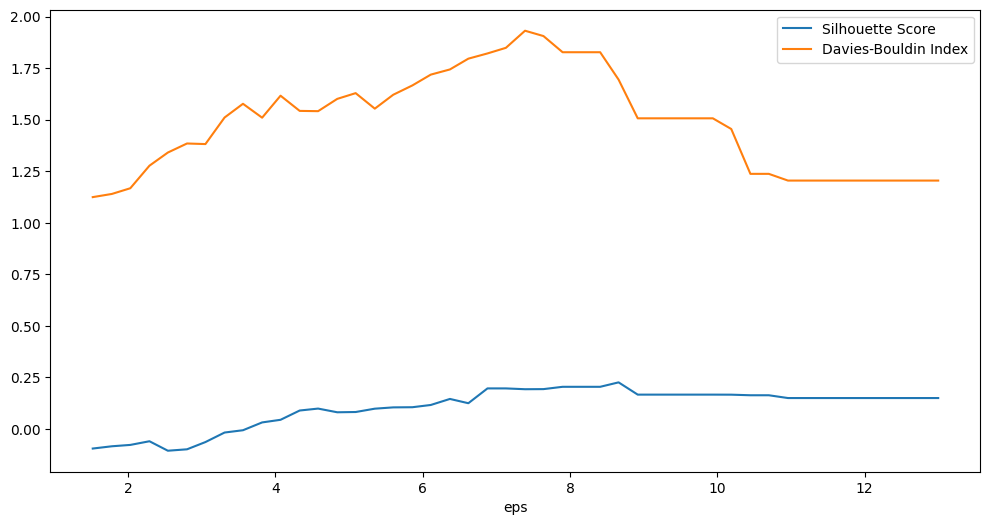

In [309]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

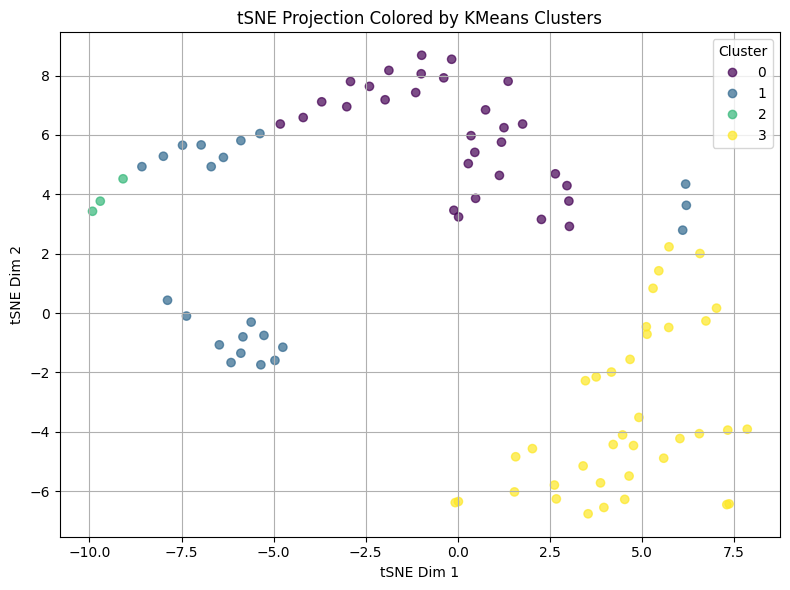

In [310]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        11     64         -0.268606   
1    0.05            2        10     58         -0.227989   
2    0.06            2        11     51         -0.113215   
3    0.06            2        10     48         -0.163201   
4    0.07            2         8     45          0.091304   
..    ...          ...       ...    ...               ...   
195  0.98            2         1      1               NaN   
196  0.99            2         1      1               NaN   
197  0.99            2         1      1               NaN   
198  1.00            2         1      1               NaN   
199  1.00            2         1      1               NaN   

     Davies-Bouldin Index  
0                0.811271  
1                0.788097  
2                0.788918  
3                0.789596  
4                0.626752  
..                    ...  
195                   NaN  
196                   NaN  
197                   NaN  
198                   NaN  
199                   NaN  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

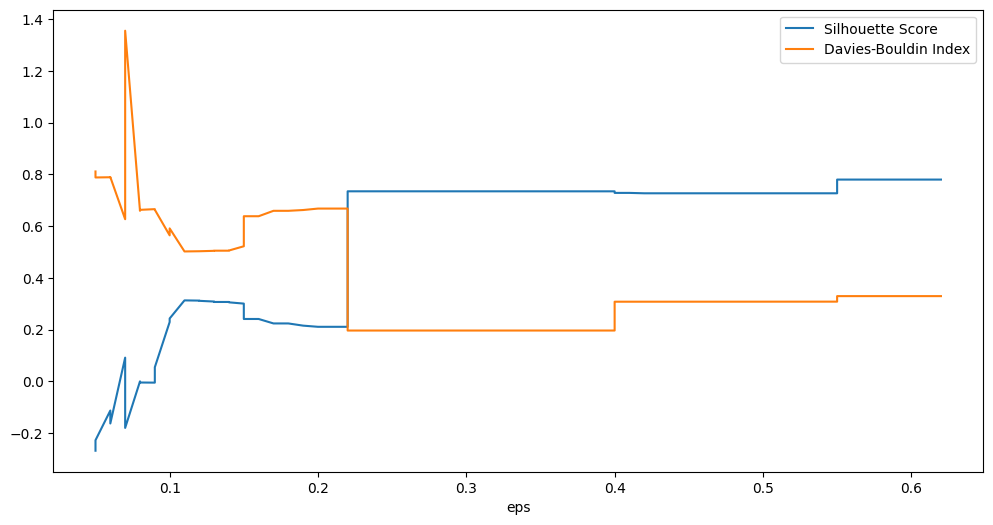

In [311]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Fall (3)

In [312]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [313]:
#Start with spring and work our way down to winter
season = 3
season_year = 2009
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 91 entries, 2009-09-01 to 2009-11-30
Columns: 259 entries, 10000009 to 25000592
dtypes: float64(259)
memory usage: 184.8 KB


None

            10000009  11000011  11000016  13000011  13000019  13000065  \
2009-09-01  0.942878  0.369766  0.449761  0.495313  0.736466  0.860698   
2009-09-02  0.873742  0.376274  0.450628  0.444801  0.682950  0.820150   
2009-09-03  0.867365  0.386355  0.481216  0.573333  0.687454  0.969559   
2009-09-04  0.962800  0.407619  0.580472  0.816902  0.904704  1.594688   
2009-09-05  1.163919  0.426449  0.617666  0.875247  1.100017  2.055398   
...              ...       ...       ...       ...       ...       ...   
2009-11-26  2.191301  1.261629  3.243411  1.513290  2.216191  3.555718   
2009-11-27  2.014437  1.407386  3.456696  1.556270  2.240284  3.589526   
2009-11-28  1.925401  1.540648  3.554285  1.198038  1.875733  2.955294   
2009-11-29  1.431407  1.651888  3.320103  1.147317  1.484122  2.289051   
2009-11-30  1.430194  1.763441  3.171002  1.174323  1.540436  2.380009   

            14000016  14000020  14000022  15000002  ...  66000014  67000017  \
2009-09-01  0.693759  0.404905  

          2009-09-01  2009-09-02  2009-09-03  2009-09-04  2009-09-05  \
10000009   -0.016615   -0.024779   -0.029816   -0.044951   -0.043148   
11000011   -0.068648   -0.069236   -0.071557   -0.088482   -0.095311   
11000016   -0.061385   -0.062591   -0.063325   -0.074929   -0.081786   
13000011   -0.057250   -0.063112   -0.055331   -0.056390   -0.063567   
13000019   -0.035355   -0.041829   -0.045428   -0.049506   -0.047668   
...              ...         ...         ...         ...         ...   
8000001    -0.051936   -0.053261   -0.053269   -0.058364   -0.070136   
9000001    -0.035658   -0.042692   -0.040773   -0.041696   -0.061580   
9000015    -0.033852   -0.040456   -0.039106   -0.041959   -0.061205   
22000047   -0.067501   -0.068451   -0.070090   -0.086483   -0.094506   
25000592   -0.017911   -0.020416   -0.021113   -0.020621   -0.034231   

          2009-09-06  2009-09-07  2009-09-08  2009-09-09  2009-09-10  ...  \
10000009   -0.028291   -0.034824   -0.049437   -0.051950  

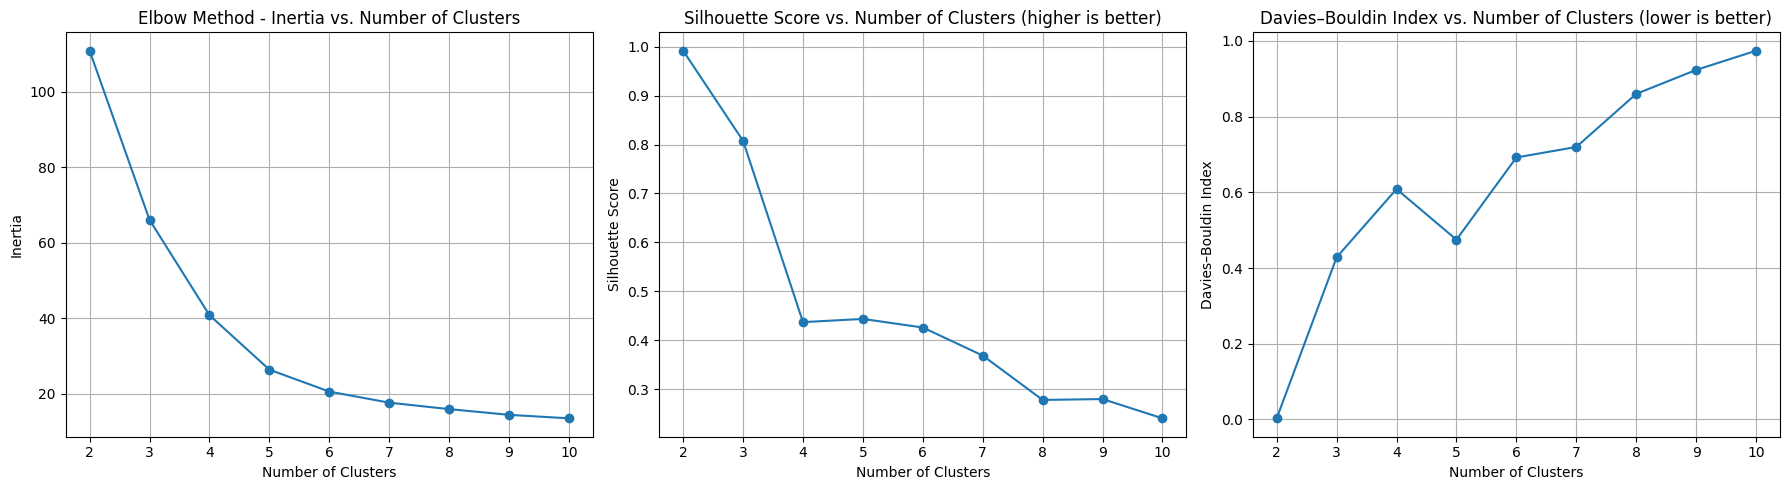

In [314]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
11000011        0
11000016        0
13000011        0
13000019        0

            10000009  11000011  11000016  13000011  13000019  13000065  \
2009-09-01  0.942878  0.369766  0.449761  0.495313  0.736466  0.860698   
2009-09-02  0.873742  0.376274  0.450628  0.444801  0.682950  0.820150   
2009-09-03  0.867365  0.386355  0.481216  0.573333  0.687454  0.969559   
2009-09-04  0.962800  0.407619  0.580472  0.816902  0.904704  1.594688   
2009-09-05  1.163919  0.426449  0.617666  0.875247  1.100017  2.055398   
...              ...       ...       ...       ...       ...       ...   
2009-11-26  2.191301  1.261629  3.243411  1.513290  2.216191  3.555718   
2009-11-27  2.014437  1.407386  3.456696  1.556270  2.240284  3.589526   
2009-11-28  1.925401  1.540648  3.554285  1.198038  1.875733  2.955294   
2009-11-29  1.431407  1.651888  3.320103  1.147317  1.484122  2.289051   
2009-11-30  1.430194  1.763441  3.171002  1.174323  1.540436  2.380009   

            14000016  14000020  14000022  15000002  ...  66000014  67000017  \
2009-09-01  0.693759  0.404905  

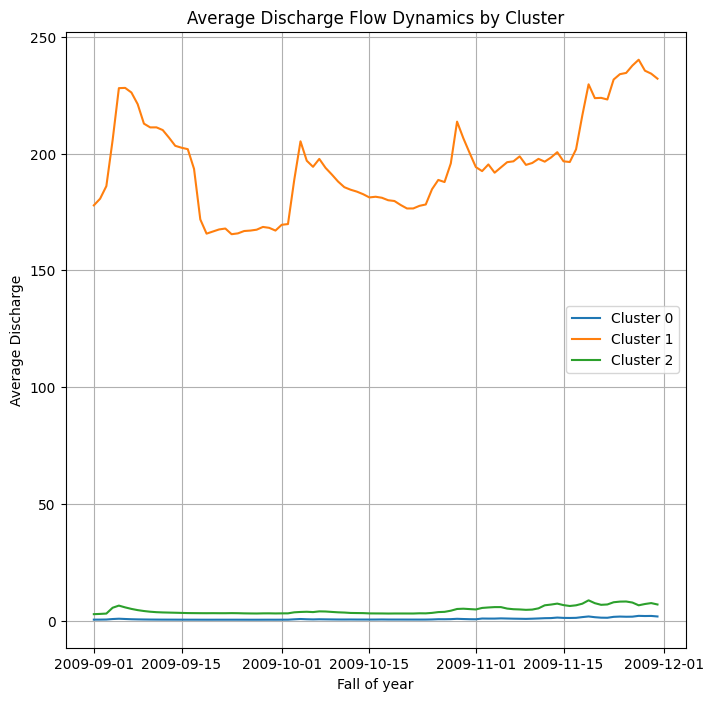

In [315]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Fall of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [316]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [317]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  11000011  11000016  13000011  13000019  13000065  \
2009-09-01  0.942878  0.369766  0.449761  0.495313  0.736466  0.860698   
2009-09-02  0.873742  0.376274  0.450628  0.444801  0.682950  0.820150   
2009-09-03  0.867365  0.386355  0.481216  0.573333  0.687454  0.969559   
2009-09-04  0.962800  0.407619  0.580472  0.816902  0.904704  1.594688   
2009-09-05  1.163919  0.426449  0.617666  0.875247  1.100017  2.055398   
...              ...       ...       ...       ...       ...       ...   
2009-11-26  2.191301  1.261629  3.243411  1.513290  2.216191  3.555718   
2009-11-27  2.014437  1.407386  3.456696  1.556270  2.240284  3.589526   
2009-11-28  1.925401  1.540648  3.554285  1.198038  1.875733  2.955294   
2009-11-29  1.431407  1.651888  3.320103  1.147317  1.484122  2.289051   
2009-11-30  1.430194  1.763441  3.171002  1.174323  1.540436  2.380009   

            14000016  14000020  14000022  15000002  ...  66000014  67000017  \
2009-09-01  0.693759  0.404905  0.802379  0.551828  ...  0.025767  0.008689   
2009-09-02  0.685376  0.426314  0.783196  0.529567  ...  0.026460  0.009138   
2009-09-03  0.690747  0.647419  0.794718  0.525099  ...  0.035096  0.012864   
2009-09-04  0.741451  0.925262  0.864458  0.674060  ...  0.032033  0.011448   
2009-09-05  0.779585  0.828460  0.905559  0.938711  ...  0.031912  0.018326   
...              ...       ...       ...       ...  ...       ...       ...   
2009-11-26  1.497834  0.764946  1.523558  1.163217  ...  0.272942  0.601427   
2009-11-27  1.474530  0.712155  1.498425  1.956519  ...  0.314078  0.503929   
2009-11-28  1.326012  0.591950  1.342949  1.433102  ...  0.630732  0.846108   
2009-11-29  1.180877  0.622724  1.202946  1.157509  ...  0.729126  1.036004   
2009-11-30  1.236376  0.614498  1.252290  1.246103  ...  0.597164  0.825239   

            67000018  67000019   7000003   8000001   9000001   9000015  \
2009-09-01  0.018224  0.015124  0.374131  0.553841  0.733126  0.753018   
2009-09-02  0.012865  0.014314  0.377371  0.555037  0.673298  0.698320   
2009-09-03  0.027652  0.018643  0.408741  0.597095  0.741096  0.760305   
2009-09-04  0.030357  0.013468  0.552521  0.791729  1.004312  1.000951   
2009-09-05  0.044765  0.021786  0.569351  0.782365  0.903342  0.908639   
...              ...       ...       ...       ...       ...       ...   
2009-11-26  0.747640  0.783695  2.616518  2.740338  2.333765  2.216409   
2009-11-27  0.999286  0.804754  2.775637  2.731400  4.208305  3.930215   
2009-11-28  2.111339  1.026415  2.820094  2.675615  4.965352  4.622347   
2009-11-29  2.067138  1.053894  2.685417  2.502560  3.785501  3.543665   
2009-11-30  1.376445  0.977875  2.545446  2.521923  3.516207  3.297461   

            22000047  25000592  
2009-09-01  0.382406  0.928597  
2009-09-02  0.385056  0.922571  
2009-09-03  0.403258  0.967651  
2009-09-04  0.433113  1.273098  
2009-09-05  0.437831  1.289992  
...              ...       ...  
2009-11-26  0.491674  1.718292  
2009-11-27  0.547079  1.915859  
2009-11-28  0.551930  1.733707  
2009-11-29  0.535956  1.749554  
2009-11-30  0.554954  1.570173  

[91 rows x 259 columns]

<Axes: >

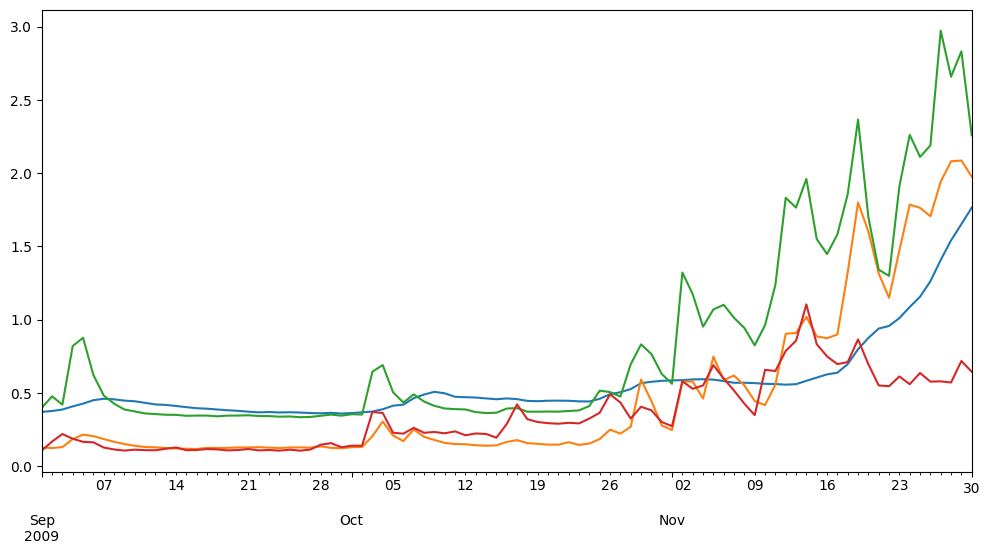

In [318]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

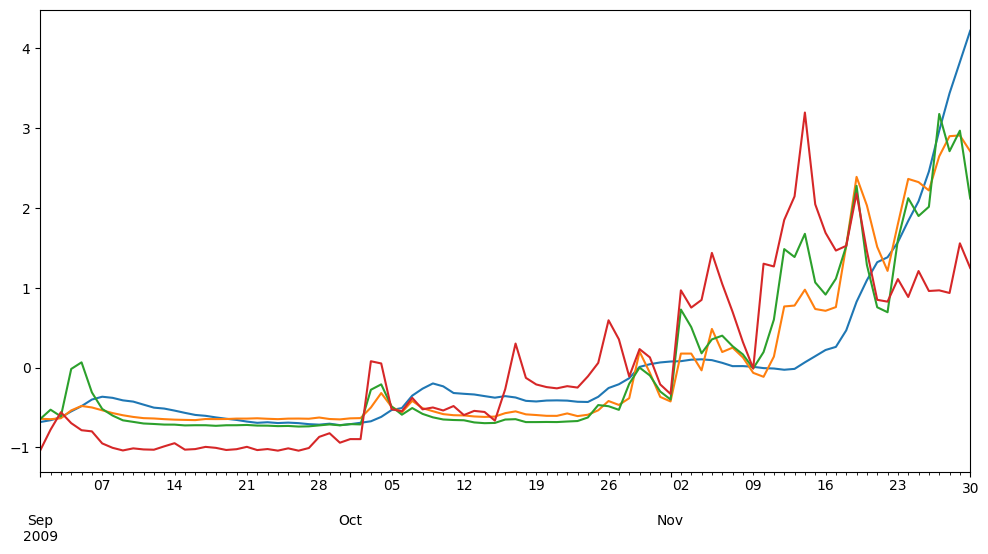

In [319]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

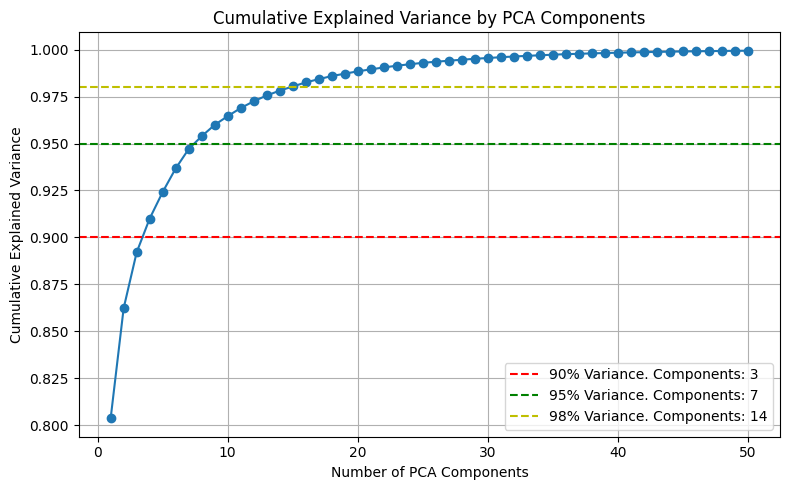

In [320]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [321]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[-10.59327261,  -2.56763674,  -0.80678453, ...,   0.69835129,
         -0.98310892,   0.30995905],
       [-10.12391977,  -2.17833886,  -0.47562767, ...,   0.69550701,
         -1.0686469 ,   0.12672989],
       [ -8.7932219 ,  -1.32632017,   1.16559253, ...,   1.05213055,
         -1.12985839,  -0.15433383],
       ...,
       [ 38.02586313,  -8.94224301,  -4.29023952, ...,  -1.07311435,
         -2.02489897,  -0.27472655],
       [ 40.16238769,  -5.95882204,  -6.9601539 , ...,  -0.81009594,
         -0.18706808,  -0.40857874],
       [ 35.25299395,  -5.60670602,  -8.28112123, ...,   1.88553153,
          1.54749252,   0.36710019]], shape=(91, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_26696\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


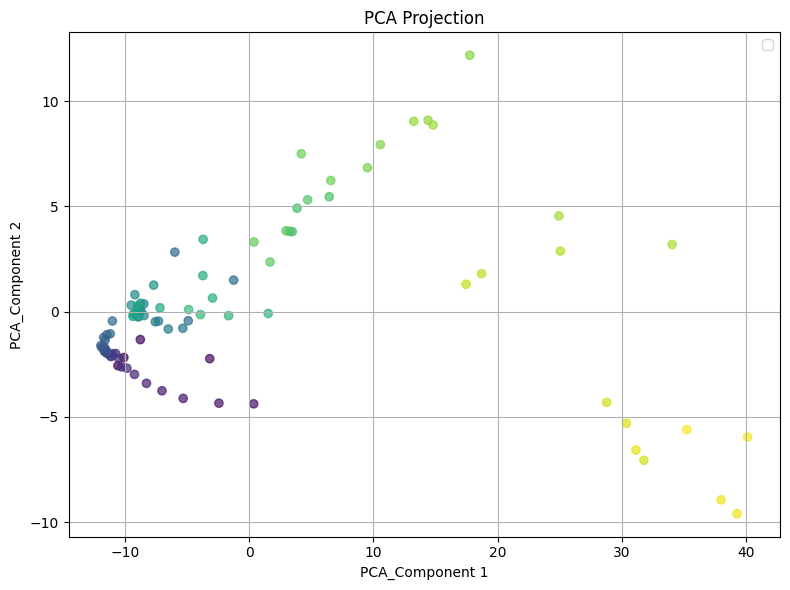

In [322]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_26696\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


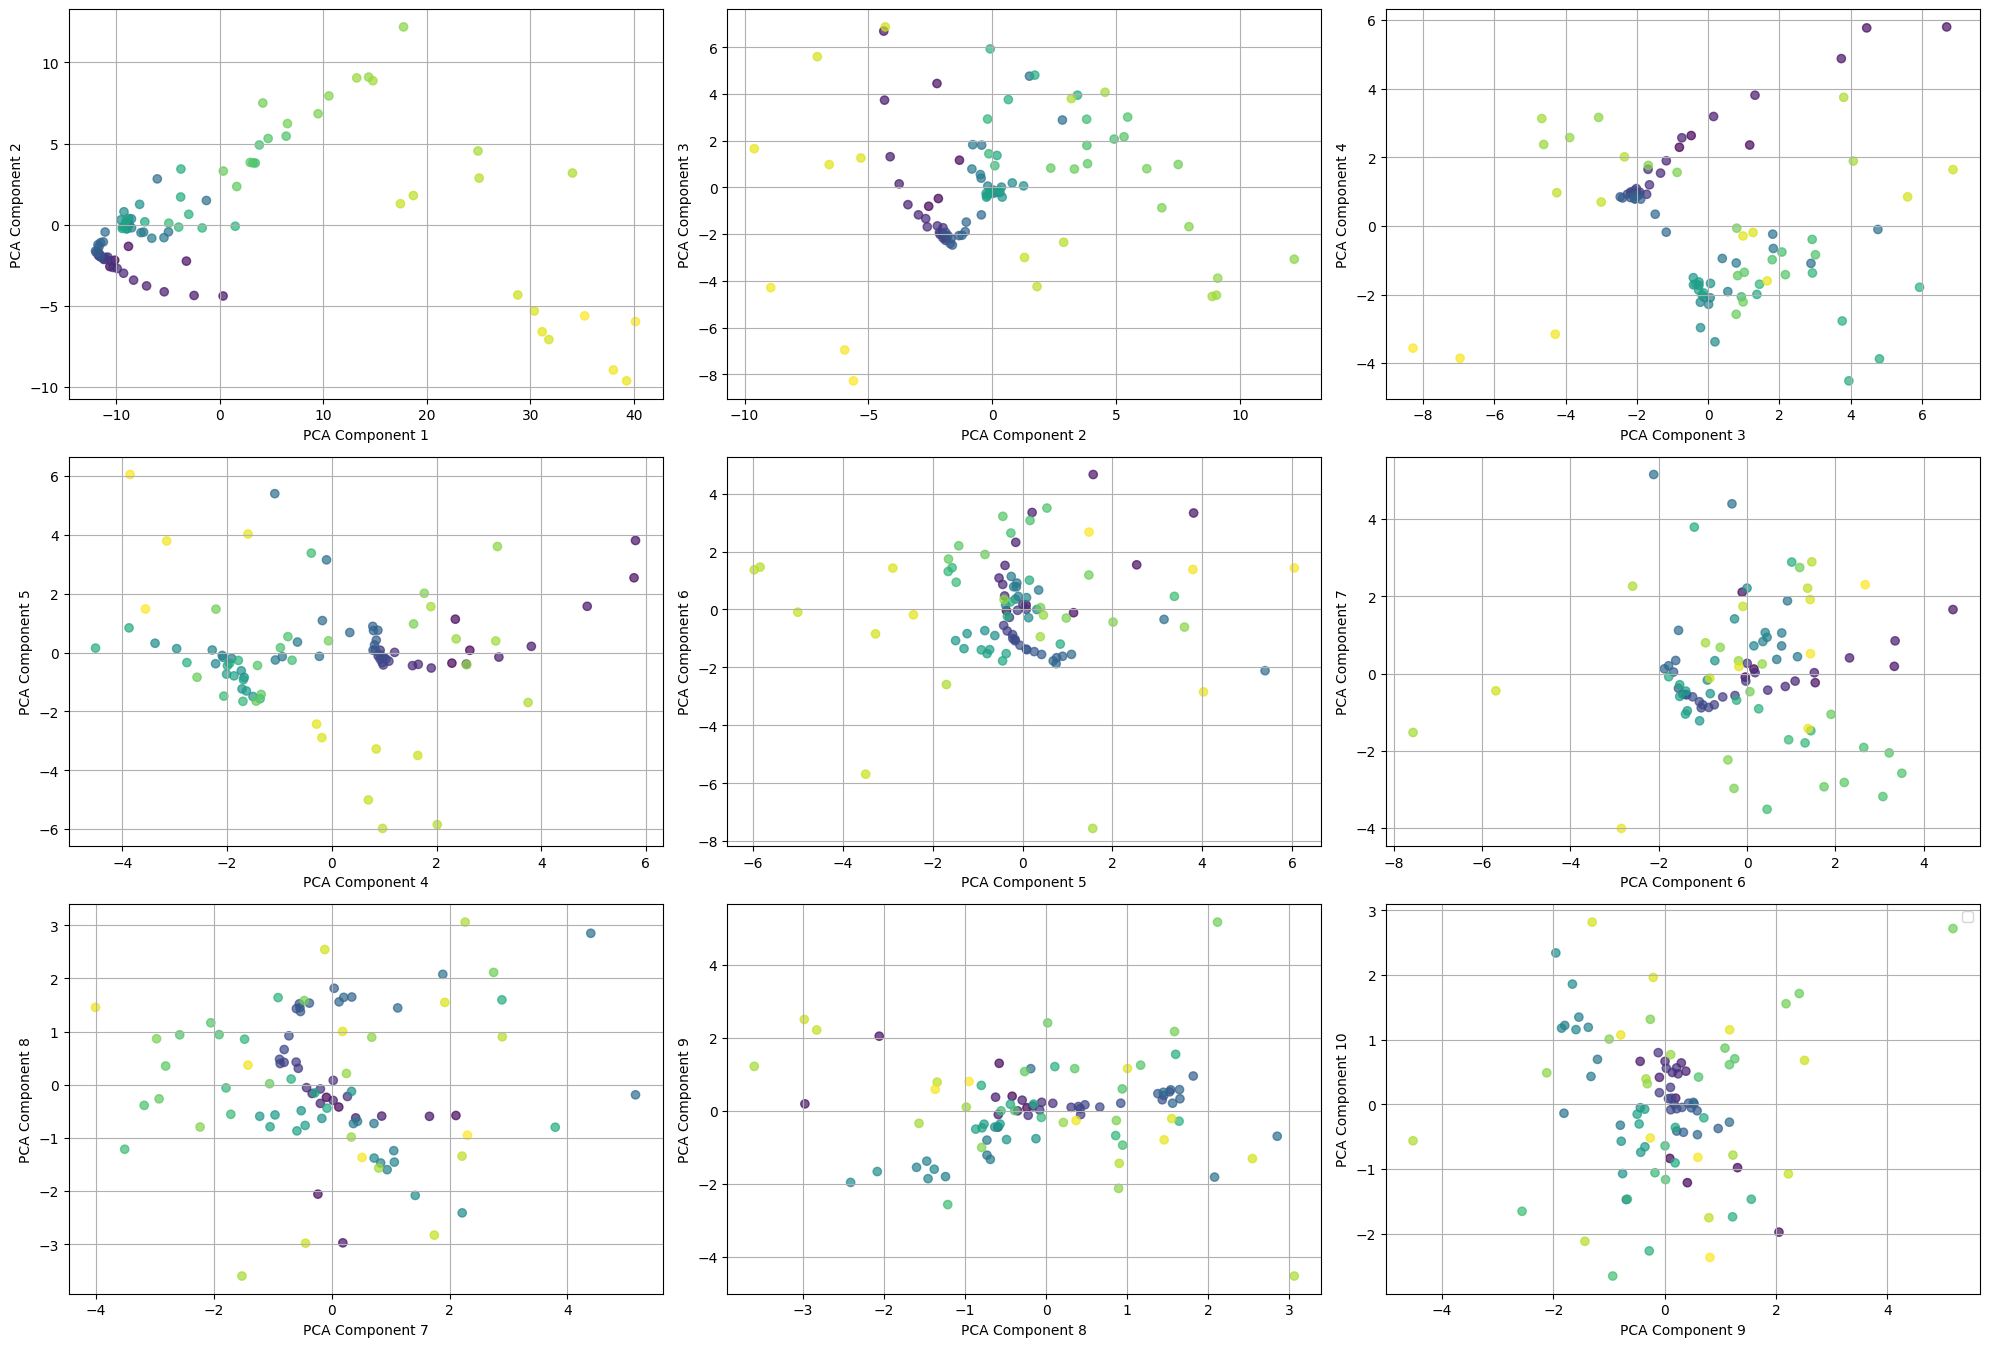

In [323]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [324]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.454
KMeans Davies-Bouldin Index is 0.940


<Axes: xlabel='k'>

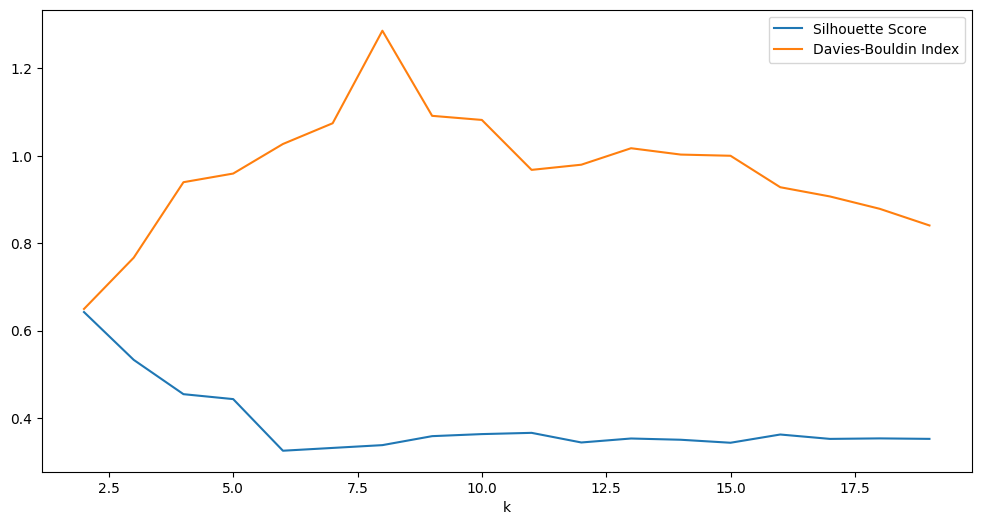

In [325]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         2     83         -0.216747   
1    0.76            3         2     81         -0.193594   
2    1.01            3         3     69         -0.097808   
3    1.27            3         3     60          0.017675   
4    1.52            3         3     56          0.076388   
5    1.78            3         3     53          0.097974   
6    2.03            3         3     52          0.103073   
7    2.29            3         3     47          0.143896   
8    2.54            3         3     47          0.143896   
9    2.80            3         2     46          0.175101   
10   3.05            3         3     42          0.140024   
11   3.31            3         4     39          0.083853   
12   3.56            3         5     33          0.130018   
13   3.82            3         5     31          0.146128   
14   4.07            3         5     31          0.146128   
15   4.33            3         4     31          0.157600   
16   4.58            3         3     30          0.284300   
17   4.84            3         3     27          0.316694   
18   5.09            3         3     26          0.327177   
19   5.35            3         3     25          0.325175   
20   5.60            3         3     25          0.325175   
21   5.86            3         4     22          0.337209   
22   6.11            3         4     22          0.337209   
23   6.37            3         2     21          0.409996   
24   6.62            3         2     18          0.422525   
25   6.88            3         1     17               NaN   
26   7.13            3         2     13          0.481581   
27   7.39            3         2     11          0.537017   
28   7.64            3         2     11          0.537017   
29   7.90            3         2     10          0.571848   
30   8.15            3         3      7          0.488902   
31   8.41            3         3      7          0.488902   
32   8.66            3         4      4          0.505291   
33   8.92            3         4      4          0.505291   
34   9.17            3         4      4          0.505291   
35   9.43            3         4      4          0.505291   
36   9.68            3         4      4          0.505291   
37   9.94            3         4      4          0.505291   
38  10.19            3         4      3          0.509107   
39  10.45            3         4      3          0.509107   
40  10.70            3         4      2          0.513221   
41  10.96            3         4      2          0.513221   
42  11.21            3         4      2          0.513221   
43  11.47            3         3      2          0.566572   
44  11.72            3         3      2          0.566572   
45  11.98            3         3      2          0.566572   
46  12.23            3         3      2          0.566572   
47  12.49            3         3      2          0.566572   
48  12.74            3         3      2          0.566572   
49  13.00            3         3      2          0.566572   

    Davies-Bouldin Index  
0               1.069219  
1               1.058937  
2               1.169088  
3               1.060369  
4               1.029702  
5               1.005734  
6               1.013070  
7               0.964399  
8               0.964399  
9               0.981579  
10              1.087770  
11              1.296803  
12              1.443298  
13              1.394114  
14              1.394114  
15              1.474117  
16              1.517832  
17              1.488385  
18              1.446209  
19              1.431889  
20              1.431889  
21              1.431673  
22              1.431673  
23              1.510171  
24              1.277266  
25                   NaN  
26              1.521739  
27              1.616128  
28              1.616128  
29              1.575109  
30              1.253708  
31              1.253708  
32 

<Axes: xlabel='eps'>

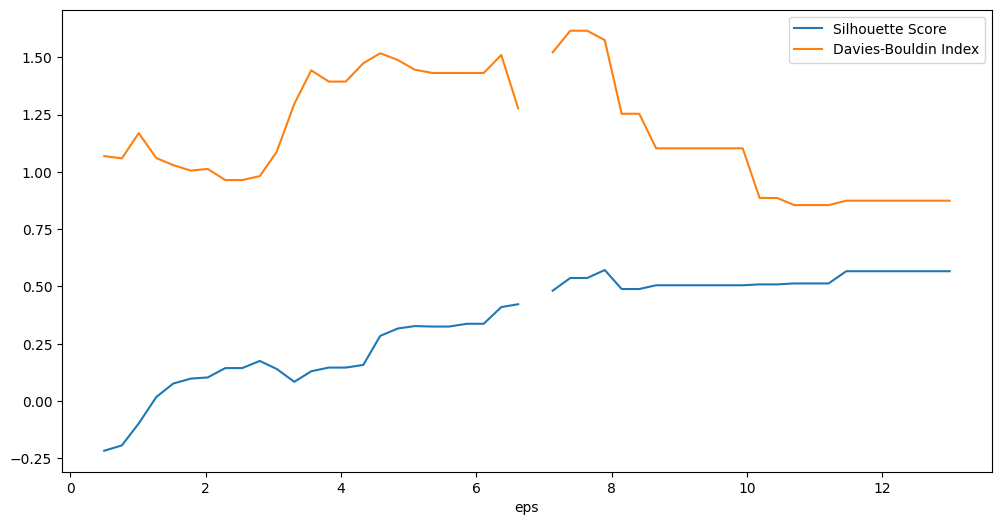

In [326]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

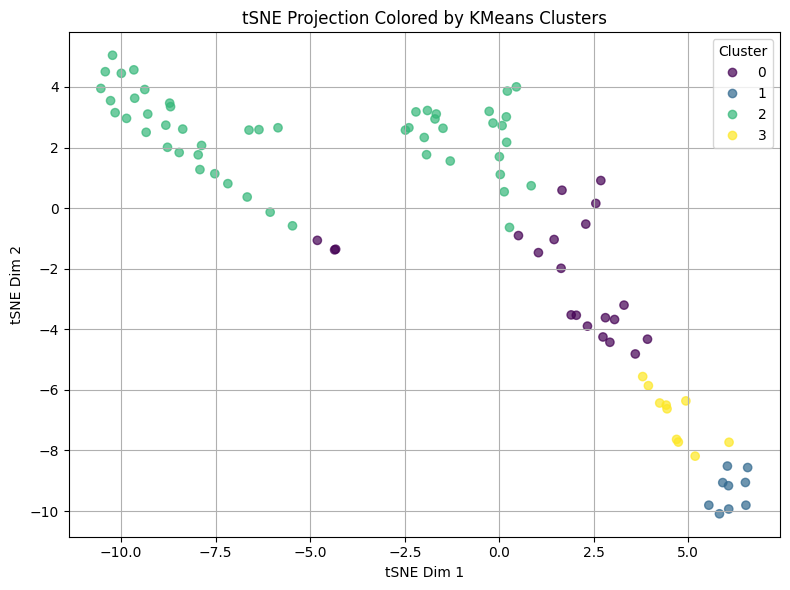

In [327]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  Davies-Bouldin Index
0   0.05            2        24    145          0.507430              0.488792
1   0.07            2        22    103          0.246309              0.493291
2   0.09            2        23     77          0.156519              0.567447
3   0.11            2        19     55          0.252263              0.740779
4   0.13            2        10     39          0.101197              0.756721
5   0.15            2         3     30          0.202104              0.677722
6   0.17            2         2     21          0.216501              0.802097
7   0.19            2         2     19          0.327481              0.592320
8   0.21            2         1     18               NaN                   NaN
9   0.22            2         2     13          0.294597              0.646769
10  0.24            2         1     12               NaN                   NaN
11  0.26            2         1     12               NaN                   NaN
12  0.28            2         1     12               NaN                   NaN
13  0.30            2         1     10               NaN                   NaN
14  0.32            2         1     10               NaN                   NaN
15  0.34            2         1     10               NaN                   NaN
16  0.36            2         1     10               NaN                   NaN
17  0.38            2         1     10               NaN                   NaN
18  0.40            2         1      9               NaN                   NaN
19  0.42            2         1      9               NaN                   NaN
20  0.44            2         1      8               NaN                   NaN
21  0.46            2         1      8               NaN                   NaN
22  0.48            2         1      8               NaN                   NaN
23  0.50            2         1      8               NaN                   NaN
24  0.52            2         1      8               NaN                   NaN
25  0.53            2         1      7               NaN                   NaN
26  0.55            2         1      7               NaN                   NaN
27  0.57            2         1      7               NaN                   NaN
28  0.59            2         1      7               NaN                   NaN
29  0.61            2         1      7               NaN                   NaN
30  0.63            2         1      7               NaN                   NaN
31  0.65            2         1      5               NaN                   NaN
32  0.67            2         2      3          0.784109              0.278780
33  0.69            2         2      3          0.784109              0.278780
34  0.71            2         2      3          0.784109              0.278780
35  0.73            2         2      3          0.784109              0.278780
36  0.75            2         2      3          0.784109              0.278780
37  0.77            2         2      3          0.784109              0.278780
38  0.79            2         2      3          0.784109              0.278780
39  0.81            2         2      3          0.784109              0.278780
40  0.83            2         2      3          0.784109              0.278780
41  0.84            2         2      2          0.787173              0.351048
42  0.86            2         2      2          0.787173              0.351048
43  0.88            2         1      2               NaN                   NaN
44  0.90            2         1      2               NaN                   NaN
45  0.92            2         1      2               NaN                   NaN
46  0.94            2         1      2               NaN                   NaN
47  0.96            2         1      2               NaN                   NaN
48  0.98            2         1      2               NaN                   NaN
49  1.00            2         1      2               Na

<Axes: xlabel='eps'>

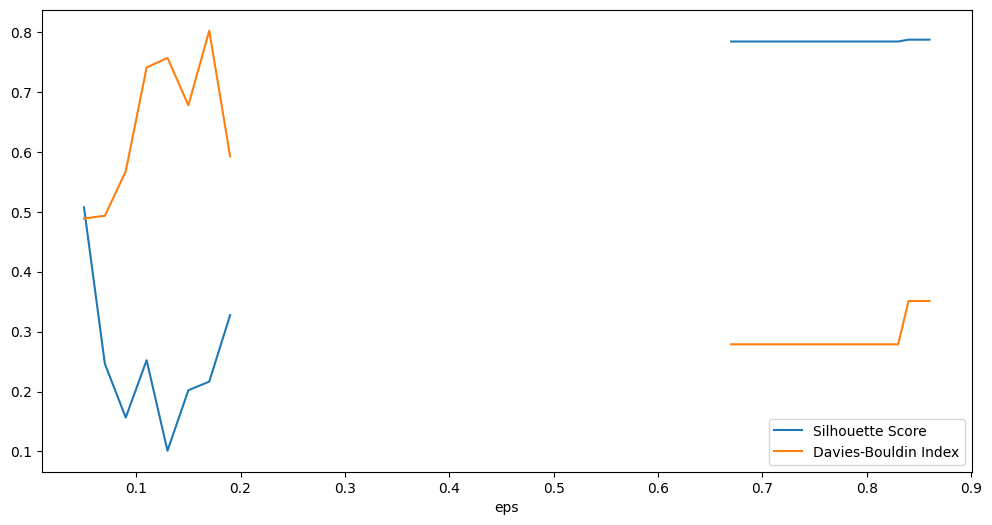

In [328]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 50)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

#### Winter (4)

In [329]:
df = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\discharge_table_complete_seasons.csv', index_col=0, parse_dates=True)
complete_seasons = pd.read_csv(PATH_PROJECT / r'output\data\discharge_tables\complete_seasons.csv', index_col=0, dtype=str)

display(df.head())
display(df.info())

10000009  10000010  10000011  10000014  10000016  10000017  \
2001-01-01  1.002974  0.756018  0.649853  0.962598  0.625556       NaN   
2001-01-02  1.426323  0.899791  0.978229  1.186935  0.983393       NaN   
2001-01-03  2.759233  1.304584  1.882787  1.893259  1.558488       NaN   
2001-01-04  2.321638  1.142382  1.593618  1.661372  1.010999       NaN   
2001-01-05  2.050273  1.142149  1.865694  1.517573  1.099160       NaN   

            1000102  1000219  1000228  1000315  ...  9000173  9000293  \
2001-01-01      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-02      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-03      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-04      NaN      NaN      NaN      NaN  ...      NaN      NaN   
2001-01-05      NaN      NaN      NaN      NaN  ...      NaN      NaN   

            9000451  9001110  season  season_year  22000047  24000034  \
2001-01-01      NaN      NaN       4         2000  0.841516       NaN   
2001-01-02      NaN      NaN       4         2000  0.952326       NaN   
2001-01-03      NaN      NaN       4         2000  0.986051       NaN   
2001-01-04      NaN      NaN       4         2000  0.896118       NaN   
2001-01-05      NaN      NaN       4         2000  0.891301       NaN   

            25000592  26000084  
2001-01-01       NaN       NaN  
2001-01-02       NaN       NaN  
2001-01-03       NaN       NaN  
2001-01-04       NaN       NaN  
2001-01-05       NaN       NaN  

[5 rows x 572 columns]

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8035 entries, 2001-01-01 to 2022-12-31
Columns: 572 entries, 10000009 to 26000084
dtypes: float64(570), int64(2)
memory usage: 35.1 MB


None

In [330]:
season = 4
season_year = 2009
season_key = f"{season_year}_{season}" 
cids = complete_seasons.loc[season_key].dropna().values
season_df = df[(df["season"] == season) & (df["season_year"] == season_year)]
#Sprint(season_df)
#print((season_df).columns)
season_df = season_df[cids]
display(season_df.info())
season_df.to_csv("season_df.csv", index = True)
print(season_df)
print("season_df.csv")

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 90 entries, 2009-12-01 to 2010-02-28
Columns: 255 entries, 10000009 to 9000015
dtypes: float64(255)
memory usage: 180.0 KB


None

            10000009  11000011  11000016  13000011  13000019  13000065  \
2009-12-01  1.310307  1.848743  2.977210  0.926937  1.199627  1.815267   
2009-12-02  1.034547  1.891509  2.573727  0.784647  1.032864  1.543838   
2009-12-03  0.958986  1.908751  2.248120  0.780352  0.978538  1.455981   
2009-12-04  1.212290  1.922923  2.239661  0.966331  1.237188  1.870752   
2009-12-05  1.284776  1.952912  2.379680  1.065784  1.416989  2.161139   
...              ...       ...       ...       ...       ...       ...   
2010-02-24  0.764301  0.660088  1.316220  0.474322  0.709462  0.788959   
2010-02-25  0.774237  0.661474  0.824412  0.491256  0.722430  0.800858   
2010-02-26  0.832087  0.660990  0.769759  0.695874  0.822322  0.892522   
2010-02-27  1.185727  0.697945  1.329408  1.059093  1.201411  1.240381   
2010-02-28  1.428139  0.776547  1.557756  1.124495  1.313413  1.343157   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2009-12-01  1.128308  1.120839  

          2009-12-01  2009-12-02  2009-12-03  2009-12-04  2009-12-05  \
10000009   -0.081471   -0.086920   -0.087981   -0.073776   -0.082555   
11000011   -0.043608   -0.025535   -0.019190   -0.022065   -0.034127   
11000016    0.035748    0.023333    0.005391    0.000983   -0.003194   
13000011   -0.108430   -0.104821   -0.100920   -0.091674   -0.098428   
13000019   -0.089254   -0.087041   -0.086565   -0.071964   -0.072972   
...              ...         ...         ...         ...         ...   
67000019   -0.107677   -0.095426   -0.087518   -0.095798   -0.112598   
7000003    -0.014124   -0.028093   -0.041651   -0.007014   -0.016508   
8000001    -0.018536   -0.029410   -0.035822   -0.000780   -0.012734   
9000001     0.041057    0.011948    0.003198    0.013651    0.017500   
9000015     0.028470    0.003044   -0.004582    0.004612    0.006934   

          2009-12-06  2009-12-07  2009-12-08  2009-12-09  2009-12-10  ...  \
10000009   -0.077479   -0.096604   -0.074736   -0.080322  

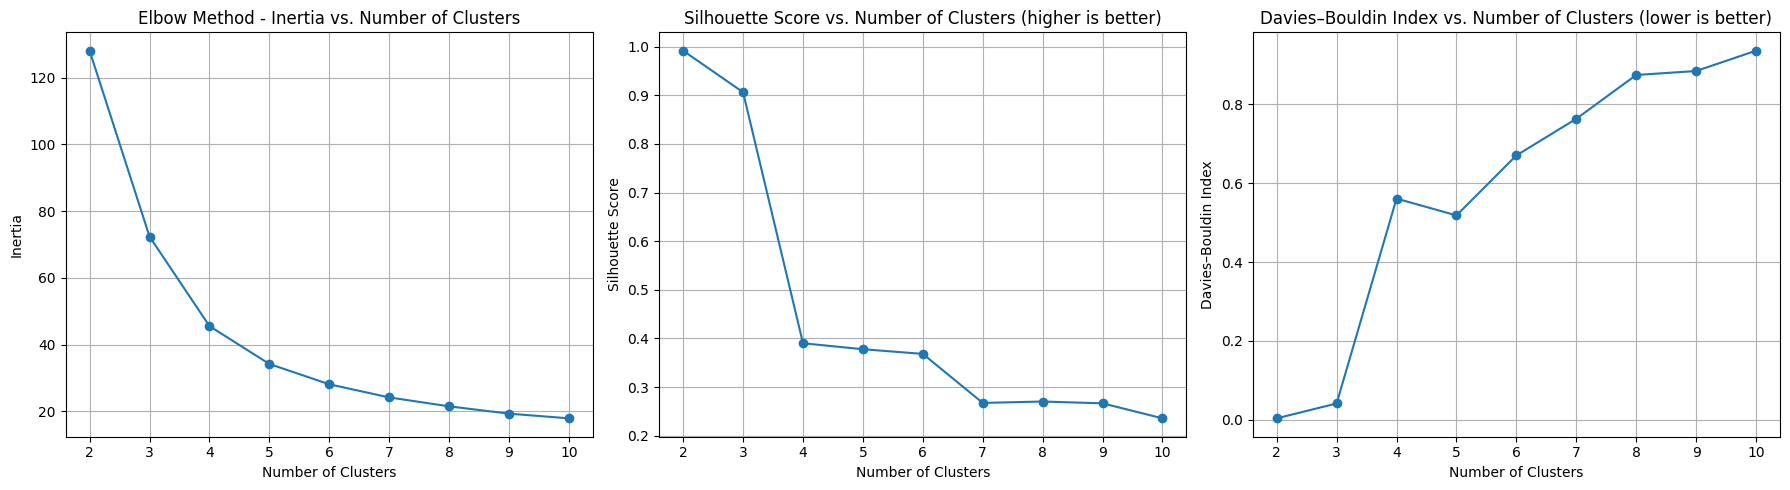

In [331]:
# Transpose the data to have catchments as rows and days as features
data = season_df.T.copy()
#print("data is: " + {data})
# Normalize each catchment's time series
# scaler = StandardScaler()
# data_scaled = scaler.fit_transform(data)
data_scaled = (data - data.mean()) / data.std(ddof=0)
print(data_scaled)
# Try different numbers of clusters and calculate the inertia, silhouette, and Davies–Bouldin
inertias = []
silhouette_scores = []
dbi_scores = []  # Davies–Bouldin Index
cluster_range = range(2, 11)

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    labels = kmeans.fit_predict(data_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_scaled, labels))
    dbi_scores.append(davies_bouldin_score(data_scaled, labels))

# Plot elbow method (inertia)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot elbow method (inertia)
axes[0].plot(cluster_range, inertias, marker='o')
axes[0].set_title('Elbow Method - Inertia vs. Number of Clusters')
axes[0].set_xlabel('Number of Clusters')
axes[0].set_ylabel('Inertia')
axes[0].grid(True)

# Plot silhouette score
axes[1].plot(cluster_range, silhouette_scores, marker='o')
axes[1].set_title('Silhouette Score vs. Number of Clusters (higher is better)')
axes[1].set_xlabel('Number of Clusters')
axes[1].set_ylabel('Silhouette Score')
axes[1].grid(True)

# Plot Davies–Bouldin Index
axes[2].plot(cluster_range, dbi_scores, marker='o')
axes[2].set_title('Davies–Bouldin Index vs. Number of Clusters (lower is better)')
axes[2].set_xlabel('Number of Clusters')
axes[2].set_ylabel('Davies–Bouldin Index')
axes[2].grid(True)

plt.tight_layout()
plt.show()

Cluster
10000009        0
11000011        0
11000016        0
13000011        0
13000019        0

            10000009  11000011  11000016  13000011  13000019  13000065  \
2009-12-01  1.310307  1.848743  2.977210  0.926937  1.199627  1.815267   
2009-12-02  1.034547  1.891509  2.573727  0.784647  1.032864  1.543838   
2009-12-03  0.958986  1.908751  2.248120  0.780352  0.978538  1.455981   
2009-12-04  1.212290  1.922923  2.239661  0.966331  1.237188  1.870752   
2009-12-05  1.284776  1.952912  2.379680  1.065784  1.416989  2.161139   
...              ...       ...       ...       ...       ...       ...   
2010-02-24  0.764301  0.660088  1.316220  0.474322  0.709462  0.788959   
2010-02-25  0.774237  0.661474  0.824412  0.491256  0.722430  0.800858   
2010-02-26  0.832087  0.660990  0.769759  0.695874  0.822322  0.892522   
2010-02-27  1.185727  0.697945  1.329408  1.059093  1.201411  1.240381   
2010-02-28  1.428139  0.776547  1.557756  1.124495  1.313413  1.343157   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2009-12-01  1.128308  1.120839  

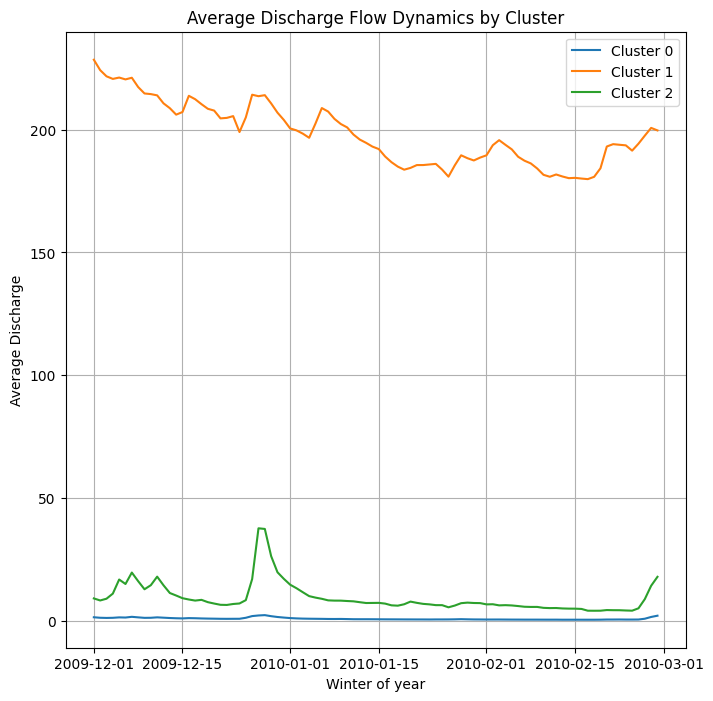

In [332]:
kmeans_final = KMeans(n_clusters=3, random_state=42, n_init=10)
labels_final = kmeans_final.fit_predict(data_scaled)

# Assign cluster labels to each catchment
clustered_data = pd.DataFrame(index=data.index)
clustered_data['Cluster'] = labels_final
# Show the first few rows of the clustered catchments
display(clustered_data.head())

# Prepare for visualization: average discharge pattern per cluster
cluster_means = season_df.T.copy()
print(season_df.copy())
cluster_means['Cluster'] = labels_final
cluster_avg = cluster_means.groupby('Cluster').mean().T

# Plot the average discharge flow over the seaason for each cluster
plt.figure(figsize=(8, 8))
for cluster in cluster_avg.columns:
    plt.plot(cluster_avg.index, cluster_avg[cluster], label=f'Cluster {cluster}')
plt.title('Average Discharge Flow Dynamics by Cluster')
plt.xlabel('Winter of year')
plt.ylabel('Average Discharge')
plt.legend()
plt.grid(True)
plt.show()

In [333]:
from pathlib import Path

out_path = Path(r'C:\Users\kscar\Documents\Github\02807_Project\output\season_clustering')
out_path.mkdir(parents=True, exist_ok=True)
pd.DataFrame(labels_final, index=data.index, columns=['Cluster']).to_csv(out_path / f'KMeans_clustering_season_{str(season)}_seasonYear_{str(season_year)}.csv', index=True)

In [334]:
df = pd.read_csv("season_df.csv", index_col=0, parse_dates=True)
df

10000009  11000011  11000016  13000011  13000019  13000065  \
2009-12-01  1.310307  1.848743  2.977210  0.926937  1.199627  1.815267   
2009-12-02  1.034547  1.891509  2.573727  0.784647  1.032864  1.543838   
2009-12-03  0.958986  1.908751  2.248120  0.780352  0.978538  1.455981   
2009-12-04  1.212290  1.922923  2.239661  0.966331  1.237188  1.870752   
2009-12-05  1.284776  1.952912  2.379680  1.065784  1.416989  2.161139   
...              ...       ...       ...       ...       ...       ...   
2010-02-24  0.764301  0.660088  1.316220  0.474322  0.709462  0.788959   
2010-02-25  0.774237  0.661474  0.824412  0.491256  0.722430  0.800858   
2010-02-26  0.832087  0.660990  0.769759  0.695874  0.822322  0.892522   
2010-02-27  1.185727  0.697945  1.329408  1.059093  1.201411  1.240381   
2010-02-28  1.428139  0.776547  1.557756  1.124495  1.313413  1.343157   

            14000016  14000022  15000002  15000032  ...  62000022  64000025  \
2009-12-01  1.128308  1.120839  0.944619  2.238812  ...  0.587246  0.296102   
2009-12-02  0.995996  0.993511  0.773343  1.850553  ...  0.569882  0.260289   
2009-12-03  0.959655  0.957351  0.726128  1.598078  ...  0.557833  0.250396   
2009-12-04  1.185684  1.189145  0.908906  1.703820  ...  0.522513  0.246364   
2009-12-05  1.190056  1.186625  0.883936  1.800677  ...  0.527573  0.239603   
...              ...       ...       ...       ...  ...       ...       ...   
2010-02-24  0.810498  0.790625  0.654705  0.813659  ...  1.194463  1.032433   
2010-02-25  0.826509  0.809967  0.651871  0.695787  ...  1.877003  1.067625   
2010-02-26  0.844733  0.836116  0.700960  0.803756  ...  5.233660  2.467777   
2010-02-27  0.987356  0.978119  1.016509  1.072242  ...  3.240322  3.630520   
2010-02-28  1.076170  1.051447  1.057035  1.438149  ...  4.910945  4.789849   

            66000014  67000017  67000018  67000019   7000003   8000001  \
2009-12-01  0.461908  0.649183  1.032531  0.937653  2.268010  2.205266   
2009-12-02  0.428235  0.578446  0.845075  0.915806  1.855802  1.837422   
2009-12-03  0.852678  0.887798  0.895710  0.965385  1.598634  1.679118   
2009-12-04  0.727936  0.750141  0.846708  0.909648  2.129755  2.215436   
2009-12-05  0.585901  0.614323  0.737394  0.870294  2.195993  2.248058   
...              ...       ...       ...       ...       ...       ...   
2010-02-24  0.313881  0.479404  0.407884  0.771691  0.695069  0.812702   
2010-02-25  0.335528  0.485739  0.428860  0.782087  0.588071  0.705847   
2010-02-26  0.710304  0.521928  0.763107  0.841470  0.691571  0.832140   
2010-02-27  2.057989  0.635345  2.158762  1.027581  1.022243  1.262140   
2010-02-28  4.217107  0.869752  4.916494  1.412229  1.380810  1.685504   

             9000001   9000015  
2009-12-01  3.052714  2.873710  
2009-12-02  2.414789  2.290485  
2009-12-03  2.217841  2.110425  
2009-12-04  2.413745  2.289531  
2009-12-05  2.665185  2.519411  
...              ...       ...  
2010-02-24  1.474072  1.430431  
2010-02-25  1.426996  1.387391  
2010-02-26  1.418393  1.379526  
2010-02-27  1.525720  1.477651  
2010-02-28  1.668119  1.607839  

[90 rows x 255 columns]

<Axes: >

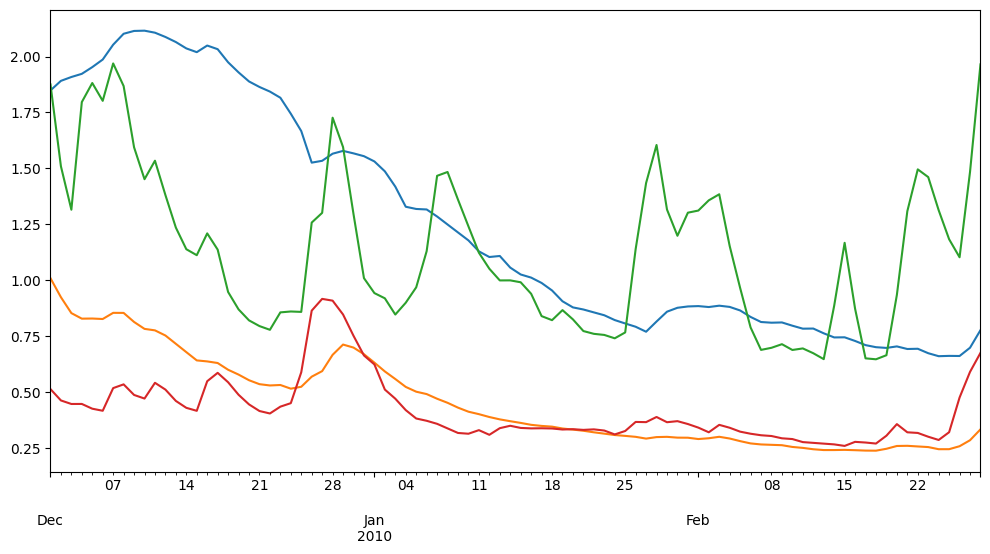

In [335]:
df.T.loc[df.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))


<Axes: >

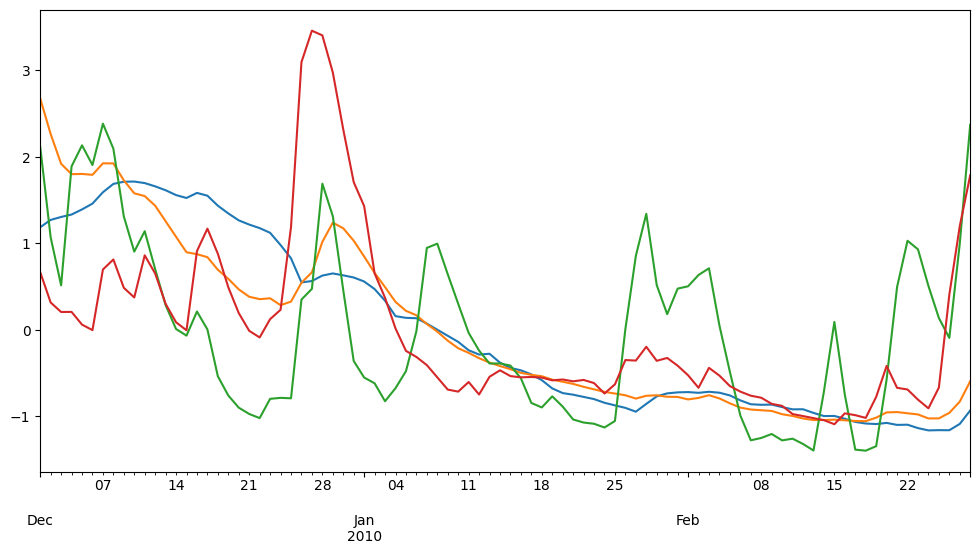

In [336]:
#1st method of scaling
df_scaled = (df-df.mean())/df.std(ddof=0)

#2nd method of scaling
df_scaled.T.loc[df_scaled.T.index[[1, 55, 100, 200]]].T.plot(legend=False, figsize=(12, 6))

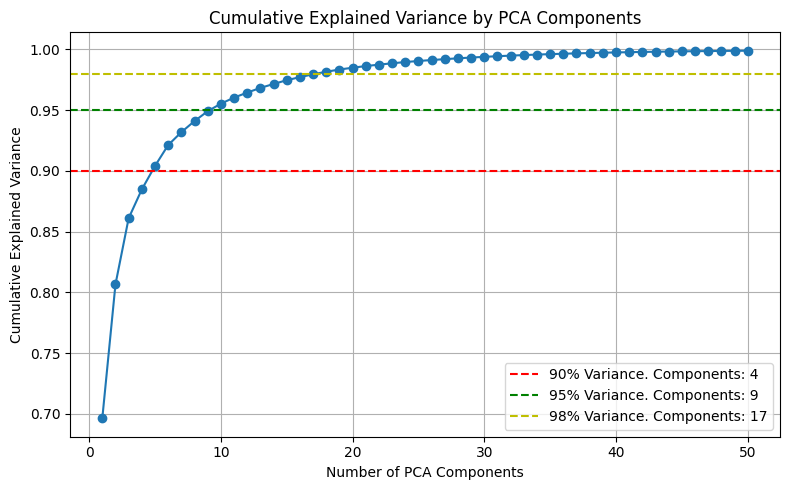

In [337]:
max_components = 50
pca_full = PCA(n_components=max_components) #remember to import PCA 
pca_full.fit(df_scaled)

explained_variance = pca_full.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance)

# Plot cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), cumulative_variance, marker='o')
plt.title("Cumulative Explained Variance by PCA Components")
plt.xlabel("Number of PCA Components")
plt.ylabel("Cumulative Explained Variance")
plt.grid(True)
plt.axhline(y=0.9, color='r', linestyle='--', label=f'90% Variance. Components: {sum(~(cumulative_variance > 0.90))}')
plt.axhline(y=0.95, color='g', linestyle='--', label=f'95% Variance. Components: {sum(~(cumulative_variance > 0.95))}')
plt.axhline(y=0.98, color='y', linestyle='--', label=f'98% Variance. Components: {sum(~(cumulative_variance > 0.98))}')
plt.legend()
plt.tight_layout()
plt.show()

In [338]:
pca = PCA(n_components=21)
pca_result = pca.fit_transform(df_scaled)
pca_result

array([[ 19.39495031, -11.10769644,   4.78004903, ...,   1.30605034,
          0.84787013,   0.69921753],
       [ 12.72345556,  -9.90330887,   2.07183378, ...,  -0.03582878,
          0.218662  ,   0.71494084],
       [ 10.53331364,  -8.4983772 ,   1.38176053, ...,  -1.88397668,
         -0.26700302,   0.61598616],
       ...,
       [ -2.65529334,   9.22220806,   5.36940025, ...,  -1.26803388,
          1.57173615,  -0.39374842],
       [ 17.05332033,  14.95947367,  13.02040193, ...,   1.70797645,
         -1.35775348,   0.70320777],
       [ 32.47274522,  21.80701475,  12.62221709, ...,  -0.93309508,
          0.28110708,  -0.3773222 ]], shape=(90, 21))

C:\Users\kscar\AppData\Local\Temp\ipykernel_26696\1787641122.py:8: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


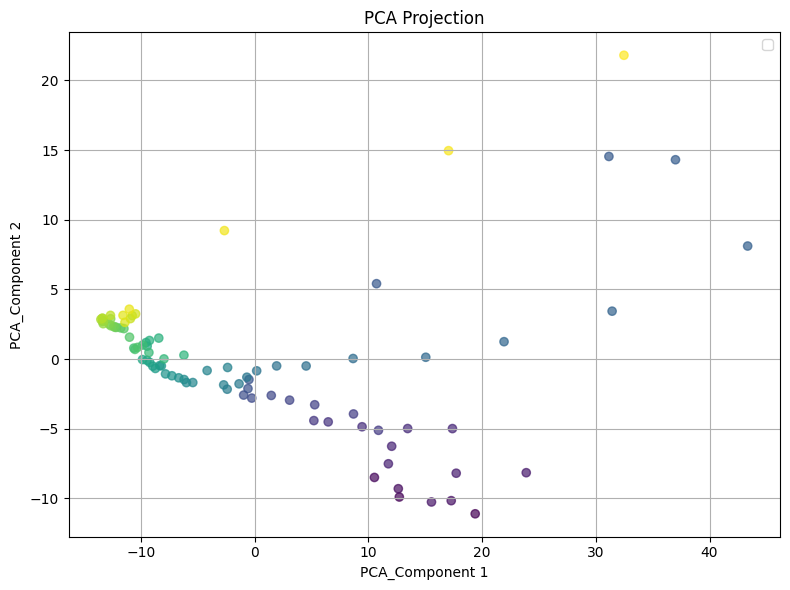

In [339]:
plt.figure(figsize=(8,6))
plt.scatter(pca_result[:, 0], pca_result[:, 1], c=df.index, alpha=0.7)
plt.title("PCA Projection")
plt.xlabel("PCA_Component 1")
plt.ylabel("PCA_Component 2")
plt.grid(True)
plt.tight_layout()
plt.legend()
plt.show()


C:\Users\kscar\AppData\Local\Temp\ipykernel_26696\2567467783.py:9: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


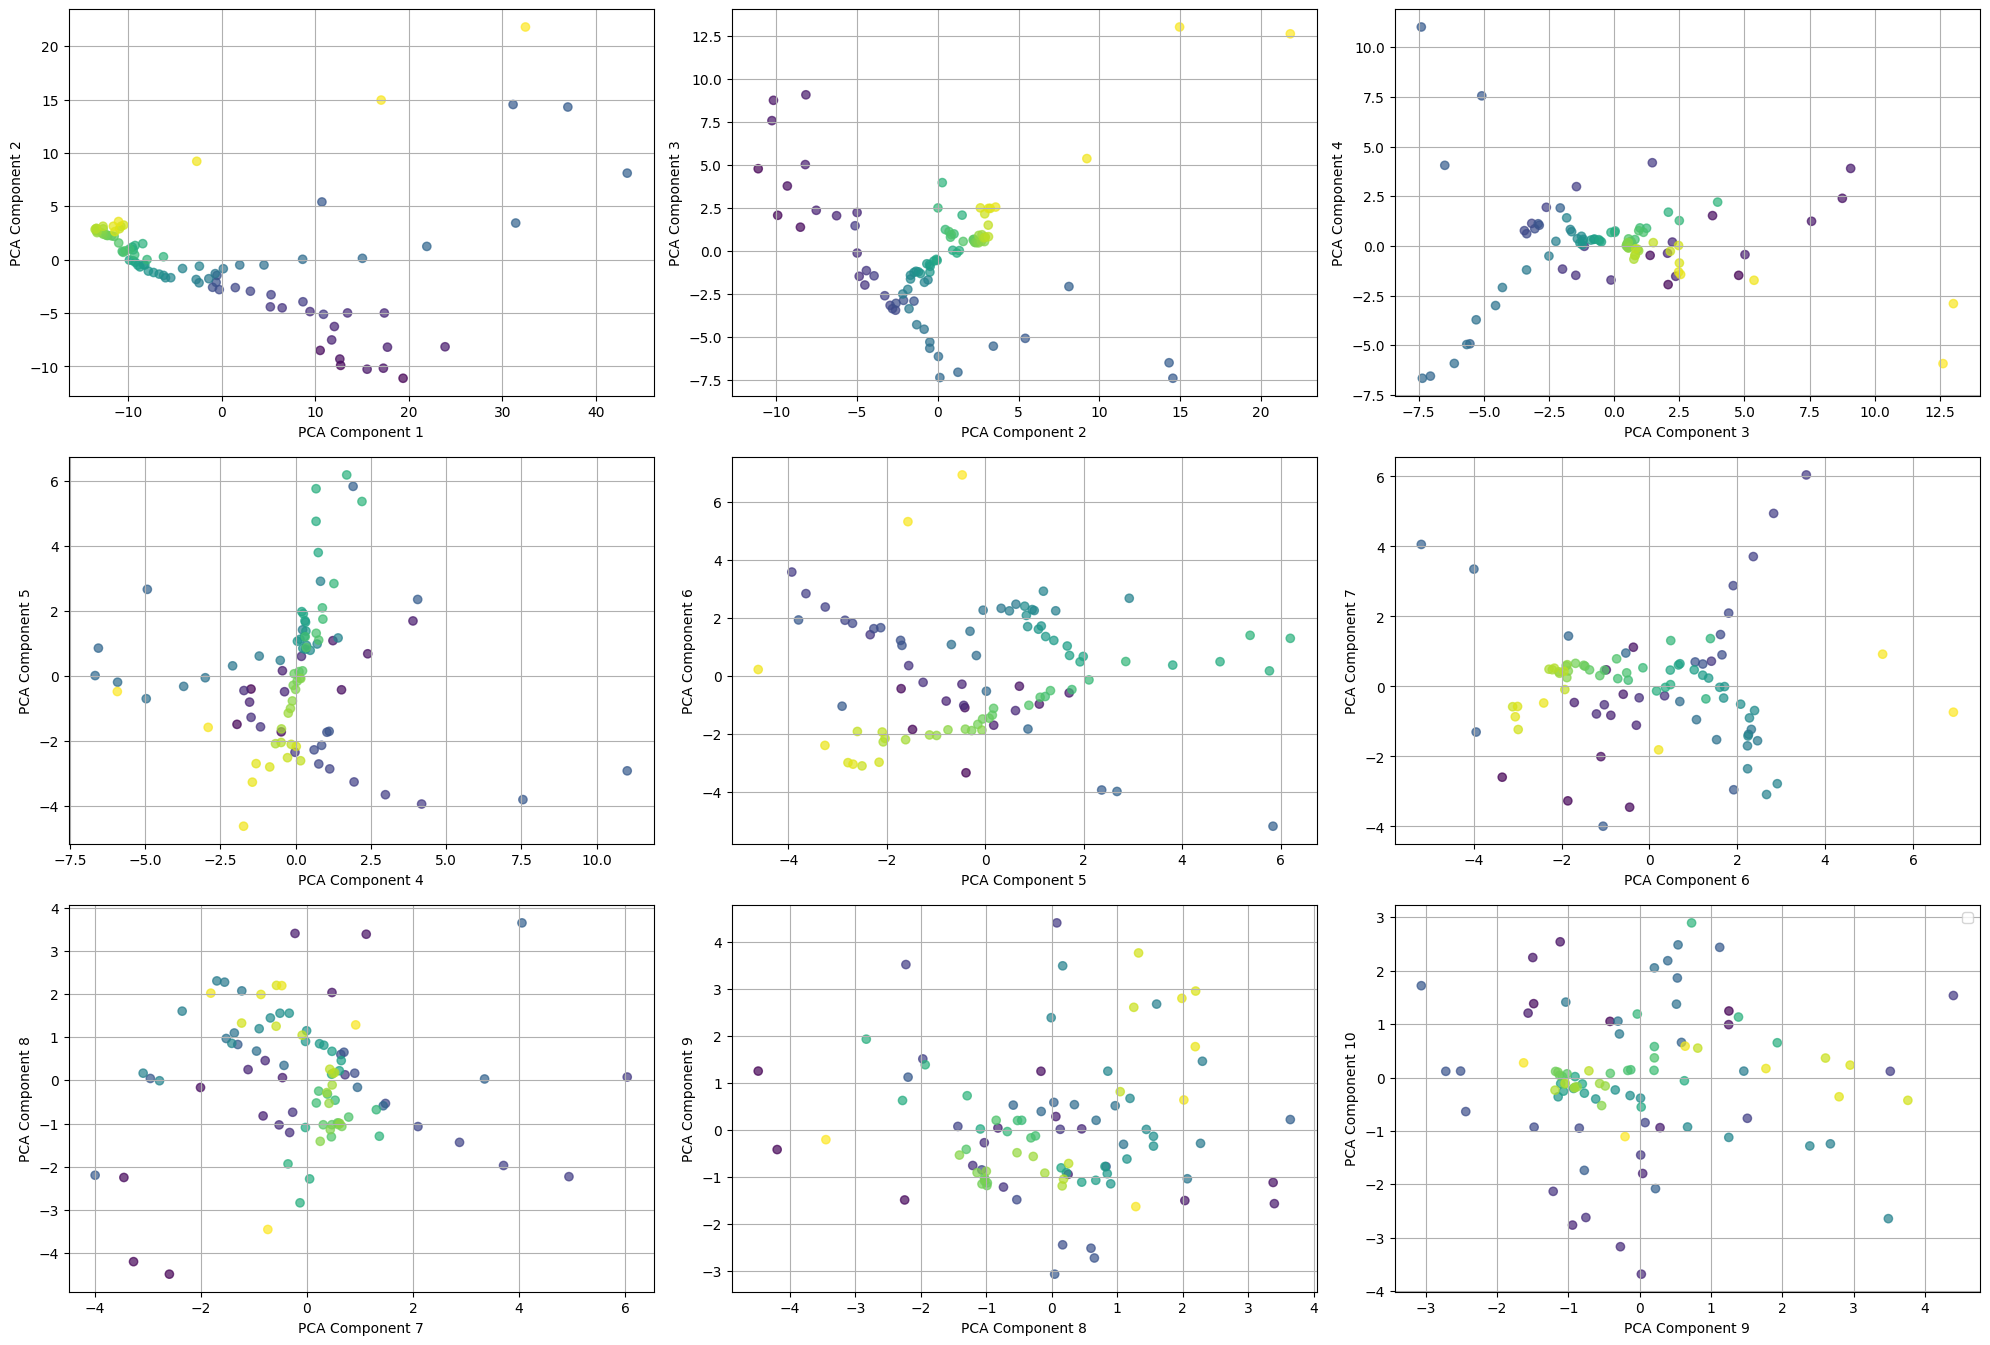

In [340]:
plt.figure(figsize=(20,40))
for i in range(9):
    plt.subplot(9, 3, i+1)
    plt.scatter(pca_result[:, i], pca_result[:, i+1], c=df.index, alpha=0.7)
    plt.xlabel(f"PCA Component {i+1}")
    plt.ylabel(f"PCA Component {i+2}")
    plt.grid(True)
    plt.tight_layout()
plt.legend()
plt.show()

In [341]:
kmeans = KMeans(n_clusters=4, random_state=42)
kmeans_labels = kmeans.fit_predict(pca_result)

kmeans_silhouette = silhouette_score(pca_result, kmeans_labels)
kmeans_db_index = davies_bouldin_score(pca_result, kmeans_labels)
print(f"KMeans Silhouette Score is {kmeans_silhouette:.3f}")
print(f"KMeans Davies-Bouldin Index is {kmeans_db_index:.3f}")

KMeans Silhouette Score is 0.425
KMeans Davies-Bouldin Index is 0.926


<Axes: xlabel='k'>

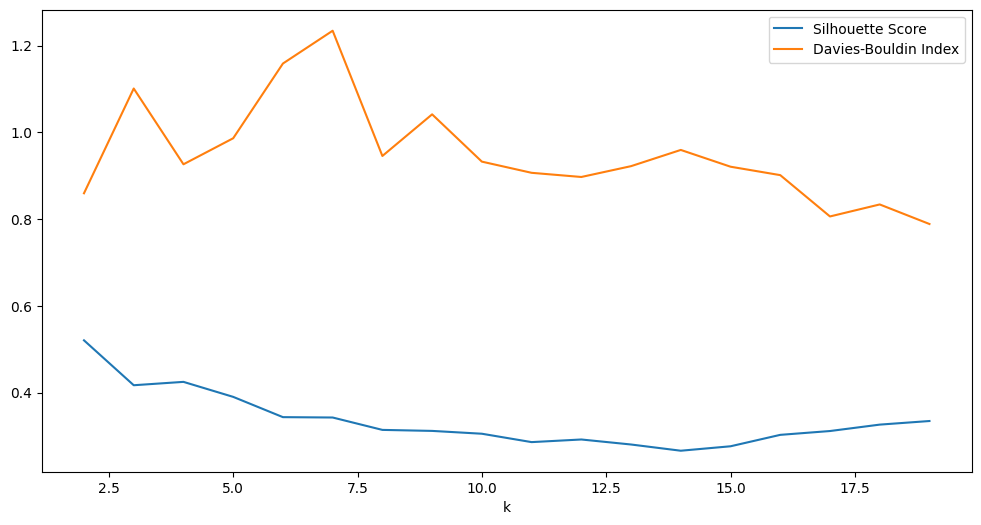

In [342]:
eval_results=[]

for k in range(2, 20):
    kmeans = KMeans(n_clusters=k, random_state=42)
    labels = kmeans.fit_predict(pca_result)

    db_index = davies_bouldin_score(pca_result, labels)
    silhouette = silhouette_score(pca_result, labels)

    eval_results.append({"k": k, "Silhouette Score":  silhouette, "Davies-Bouldin Index": db_index})
eval_df = pd.DataFrame(eval_results)
eval_df.plot(x="k", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.50            3         0     90               NaN   
1    0.76            3         2     82         -0.256171   
2    1.01            3         3     70         -0.088099   
3    1.27            3         2     65          0.012496   
4    1.52            3         2     62          0.046570   
5    1.78            3         4     54         -0.008450   
6    2.03            3         3     52          0.040104   
7    2.29            3         4     49          0.064713   
8    2.54            3         5     43          0.113937   
9    2.80            3         5     42          0.123502   
10   3.05            3         6     37          0.187258   
11   3.31            3         5     37          0.179435   
12   3.56            3         5     35          0.182114   
13   3.82            3         5     31          0.151136   
14   4.07            3         5     29          0.169633   
15   4.33            3         6     26          0.163881   
16   4.58            3         6     25          0.166635   
17   4.84            3         4     25          0.252534   
18   5.09            3         3     23          0.205615   
19   5.35            3         3     21          0.222656   
20   5.60            3         3     20          0.230943   
21   5.86            3         2     19          0.320139   
22   6.11            3         2     19          0.320139   
23   6.37            3         2     19          0.320139   
24   6.62            3         3     16          0.313467   
25   6.88            3         3     16          0.313467   
26   7.13            3         1     13               NaN   
27   7.39            3         1     13               NaN   
28   7.64            3         1     12               NaN   
29   7.90            3         1     10               NaN   
30   8.15            3         1     10               NaN   
31   8.41            3         1      9               NaN   
32   8.66            3         1      8               NaN   
33   8.92            3         1      8               NaN   
34   9.17            3         1      8               NaN   
35   9.43            3         1      8               NaN   
36   9.68            3         1      8               NaN   
37   9.94            3         1      8               NaN   
38  10.19            3         1      8               NaN   
39  10.45            3         1      8               NaN   
40  10.70            3         1      8               NaN   
41  10.96            3         1      7               NaN   
42  11.21            3         1      7               NaN   
43  11.47            3         1      7               NaN   
44  11.72            3         1      7               NaN   
45  11.98            3         1      7               NaN   
46  12.23            3         1      6               NaN   
47  12.49            3         1      6               NaN   
48  12.74            3         1      6               NaN   
49  13.00            3         1      6               NaN   

    Davies-Bouldin Index  
0                    NaN  
1               1.294390  
2               1.078710  
3               1.176855  
4               1.191446  
5               1.319584  
6               1.421350  
7               1.207262  
8               1.272992  
9               1.258075  
10              1.026356  
11              1.061722  
12              1.067545  
13              1.439777  
14              1.384297  
15              1.634353  
16              1.641663  
17              1.678216  
18              1.680545  
19              1.446573  
20              1.342820  
21              1.559829  
22              1.559829  
23              1.559829  
24              1.391463  
25              1.391463  
26                   NaN  
27                   NaN  
28                   NaN  
29                   NaN  
30                   NaN  
31                   NaN  
32 

<Axes: xlabel='eps'>

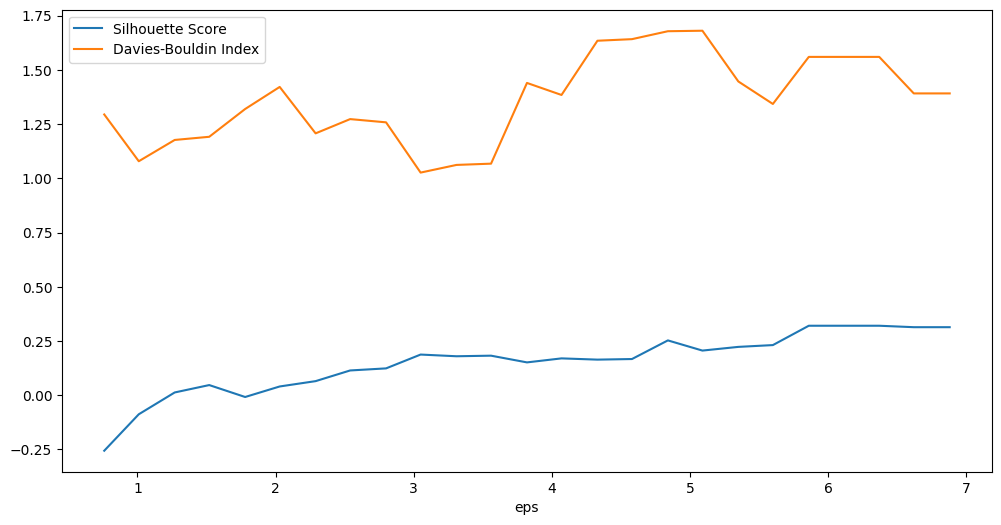

In [343]:
eps_values = np.linspace(0.5, 13.0, 50)
min_samples = 3

dbscan_results = []

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1:
        silhouette = silhouette_score(pca_result, labels)
        db_index = davies_bouldin_score(pca_result, labels)
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

dbscan_eval_df = pd.DataFrame(dbscan_results)
display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))

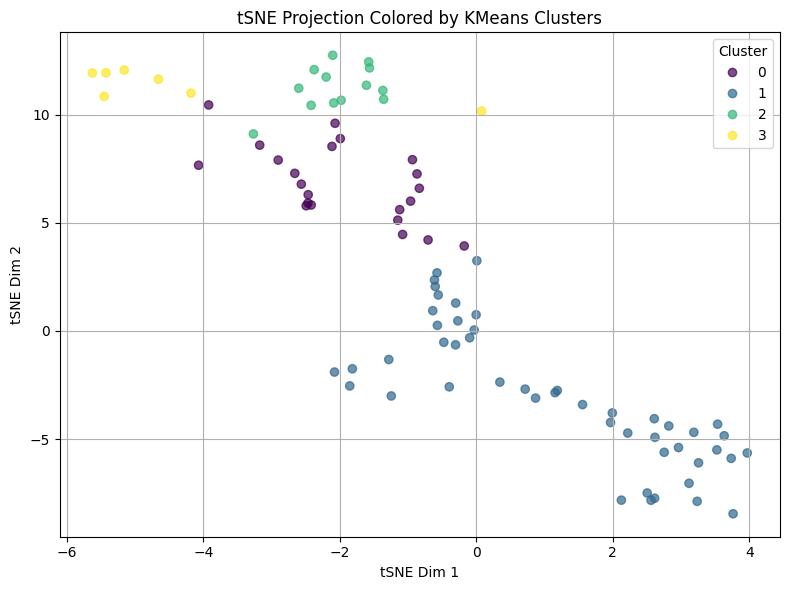

In [344]:
tSNE = TSNE(n_components=2, random_state=42, perplexity=22)
tSNE_result = tSNE.fit_transform(pca_result)

plt.figure(figsize=(8, 6))
scatter = plt.scatter(tSNE_result[:, 0], tSNE_result[:,1], c=kmeans_labels, alpha=0.7)
plt.title("tSNE Projection Colored by KMeans Clusters")
plt.xlabel("tSNE Dim 1")
plt.ylabel("tSNE Dim 2")
plt.grid(True)
plt.legend(*scatter.legend_elements(), title="Cluster")
plt.tight_layout()
plt.show()

eps  Min_Samples  Clusters  Noise  Silhouette Score  \
0    0.05            2        22    199          0.646757   
1    0.05            2        25    183          0.558904   
2    0.06            2        28    165          0.550016   
3    0.06            2        29    156          0.505317   
4    0.07            2        32    140          0.450847   
..    ...          ...       ...    ...               ...   
195  0.98            2         2      2          0.792663   
196  0.99            2         2      2          0.792663   
197  0.99            2         2      2          0.792663   
198  1.00            2         2      2          0.792663   
199  1.00            2         2      2          0.792663   

     Davies-Bouldin Index  
0                0.402534  
1                0.461520  
2                0.461051  
3                0.569534  
4                0.621268  
..                    ...  
195              0.272017  
196              0.272017  
197              0.272017  
198              0.272017  
199              0.272017  

[200 rows x 6 columns]

<Axes: xlabel='eps'>

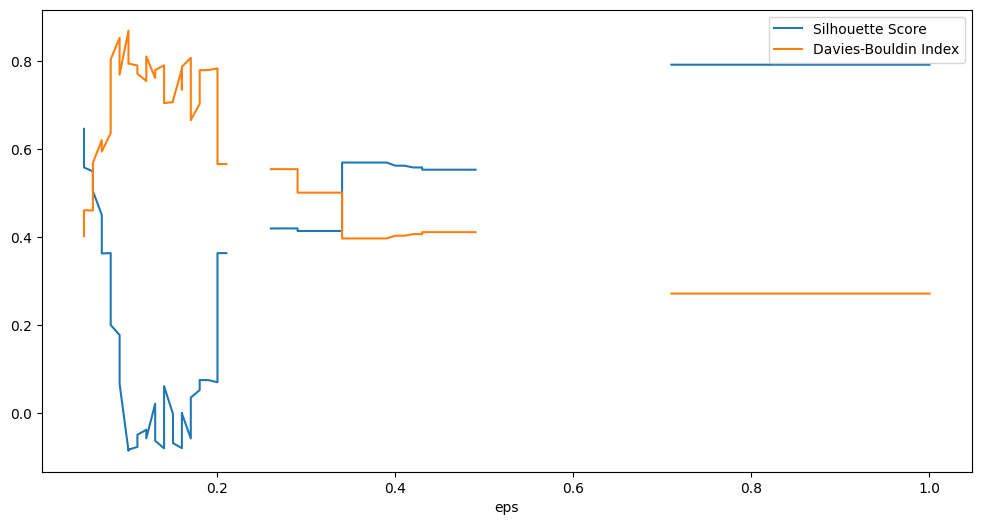

In [345]:
#For dbscan spatial plotting

data = season_df.T.copy()
data_scaled = (data - data.mean()) / data.std(ddof=0)

pca = PCA(n_components=5)
pca_result = pca.fit_transform(data_scaled)

obs_ids = data.index

eps_values = np.linspace(0.05, 1.0, 200)
min_samples = 2

dbscan_results = []

#addtions
dbscan_lavels = None
best_eps = None
best_silhouette = -999

#x = pca_result.values

for eps in eps_values:
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    labels = dbscan.fit_predict(pca_result)

    n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
    n_noise = list(labels).count(-1)

    if n_clusters > 1 and n_noise < len(labels):
        mask = labels != -1
        silhouette = silhouette_score(pca_result[mask], labels[mask])
        db_index = davies_bouldin_score(pca_result[mask], labels[mask])
    else:
        silhouette = None
        db_index = None

    dbscan_results.append({
        "eps": round(eps, 2), 
        "Min_Samples": min_samples,
        "Clusters": n_clusters,
        "Noise": n_noise,
        "Silhouette Score": silhouette,
        "Davies-Bouldin Index": db_index
    })

    if silhouette is not None and silhouette > best_silhouette:
        best_silhouette = silhouette
        best_labels = labels.copy()
        best_eps = eps

#saving for dbscan for spatial plotting
dbscan_eval_df = pd.DataFrame(dbscan_results)
dbscan_eval_df.to_csv(out_path / f"DBSCAN_Scores_season{str(season)}_seasonYear_{str(season_year)}.csv", index=False)

# print(f"eps={eps:.2f}, clusters={n_clusters}, noise={n_noise}")
# print("obs_ids length:", len(obs_ids))
# print("best_labels length:", len(best_labels))
# print("pca_result rows:", pca_result.shape[0])
# print("data_scaled rows:", data_scaled.shape[0])
# print("season_df.T rows:", season_df.T.shape[0])

# print("NaNs in data:", data.isna().sum().sum())
# print("NaNs in data_scaled:", data_scaled.isna().sum().sum())

#Use this file here 
dbscan_labels_df = pd.DataFrame({
    "obsstednr": obs_ids, #pca_result.index.to_list(), 
    "Cluster":best_labels,
    "eps_used": best_eps,
    "min_samples": min_samples})
dbscan_labels_df.to_csv(out_path / f"DBSCAN_Cluster_labels_season_{str(season)}_seasonYear{str(season_year)}.csv", index=False)
# from pathlib import Path



display(dbscan_eval_df)
dbscan_eval_df.plot(x="eps", y=["Silhouette Score", "Davies-Bouldin Index"], kind="line", figsize=(12,6))